**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Nachiappan SR\Documents\DS_Python\checks\py_references\n_grams\all-data.csv", encoding = "ISO-8859-1", header=None, names=['Sentiment', 'News Headline'])

df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [5]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [6]:
y=df['Sentiment'].values
y.shape

(4846,)

In [7]:
x=df['News Headline'].values
x.shape

(4846,)

**Train-test split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [10]:
x_train.shape

(2907,)

In [11]:
y_train.shape

(2907,)

In [12]:
x_test.shape

(1939,)

In [13]:
y_test.shape

(1939,)

In [14]:
x_train

array(["Cargotec Corporation , Press Release , April 28 , 2008 at 2.00 p.m. Finnish time Cargotec 's MacGREGOR business area providing marine cargo handling and offshore load handling solutions has received significant hatch cover orders for bulk carriers .",
       'ADP News - Feb 25 , 2009 - Finnish printed circuit board PCB maker Aspocomp Group Oyj HEL : ACG1V said today it swung to a net profit of EUR 300,000 USD 385,000 for 2008 versus a net loss of EUR 65.3 million',
       'Finnish security and privacy software solutions developer Stonesoft Oyj said on January 7 , 2008 that the preliminary sales of its StoneGate products grew by 59 pct year-on-year to 3.6 mln euro ( $ 5.3 mln ) for the fourth quarter of 2007 .',
       ...,
       "The company said that its comparable operating profit for the January-June period fell short of last year 's corresponding performance .",
       'Nordea Bank ( STO : NDA ) and Sampo Bank have helped Finnish real estate investment company Sponda ( HEL

In [15]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,"Cargotec Corporation , Press Release , April 2...",positive
1,"ADP News - Feb 25 , 2009 - Finnish printed cir...",positive
2,Finnish security and privacy software solution...,positive
3,Finnish and Swedish construction markets are s...,positive
4,"ADP News - Jan 13 , 2009 - Finnish industrial ...",neutral


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [17]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,The Remote Radio head module will be available...,positive
1,HELSINKI Thomson Financial - Shares closed lit...,positive
2,"Marathon now has a 4.6 percent stake in PLX , ...",positive
3,The production is to be liquidated before June...,positive
4,The new plant is planned to have an electricit...,neutral


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 68.1+ KB


**Pre-processing**

In [19]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#defining the function to remove punctuation
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [21]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Cargotec Corporation Press Release April 28 ...,positive
1,ADP News Feb 25 2009 Finnish printed circui...,positive
2,Finnish security and privacy software solution...,positive
3,Finnish and Swedish construction markets are s...,positive
4,ADP News Jan 13 2009 Finnish industrial and...,neutral


In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nachiappan
[nltk_data]     SR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    print("Sentence after removing stopwords:",words)
    words = [item.strip() for item in words if item.strip()]
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans
    


In [25]:
#sample!
generate_N_grams("The sun rises in the east and sets in the waist",3)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east', 'sets', 'waist']


['The sun rises', 'sun rises east', 'rises east sets', 'east sets waist']

**Create unigrams**

In [26]:
from collections import defaultdict

In [27]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [28]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text, 1):
        positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text, 1):
        negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text, 1):
        neutralValues[word]+=1

Sentence after removing stopwords: ['Cargotec', 'Corporation', '', 'Press', 'Release', '', 'April', '28', '', '2008', '200', 'pm', 'Finnish', 'time', 'Cargotec', 'MacGREGOR', 'business', 'area', 'providing', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'received', 'significant', 'hatch', 'cover', 'orders', 'bulk', 'carriers', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Feb', '25', '', '2009', '', 'Finnish', 'printed', 'circuit', 'board', 'PCB', 'maker', 'Aspocomp', 'Group', 'Oyj', 'HEL', '', 'ACG1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '300000', 'USD', '385000', '2008', 'versus', 'net', 'loss', 'EUR', '653', 'million']
Sentence after removing stopwords: ['Finnish', 'security', 'privacy', 'software', 'solutions', 'developer', 'Stonesoft', 'Oyj', 'said', 'January', '7', '', '2008', 'preliminary', 'sales', 'StoneGate', 'products', 'grew', '59', 'pct', 'yearonyear', '36', 'mln', 'euro', '', '', '53', 'mln', '', 'fourth', 'quarter

Sentence after removing stopwords: ['However', '', 'expects', 'banks', 'provide', 'alternative', 'financing', '']
Sentence after removing stopwords: ['For', 'Telenor', '', 'three', 'half', 'year', 'contract', 'worth', 'estimated', '126', 'YIT', 'chosen', 'Telenor', 'Elisa', 'principal', 'suppliers', 'ICT', 'solutions', 'Norway', '', 'Sweden', '', 'Denmark', 'Finland', '']
Sentence after removing stopwords: ['Nokia', '', 'strong', 'track', 'record', 'lowerend', 'handset', 'market', '', 'said', 'July', 'touchscreen', 'offering', 'would', 'come', 'year', 'cheaper', 'rival', 'models', 'order', 'tap', 'highervolume', 'market', '']
Sentence after removing stopwords: ['In', 'JanuarySeptember', '2009', '', 'Group', 'net', 'interest', 'income', 'increased', 'EUR', '1124', 'mn', 'EUR', '743', 'mn', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['Following', 'acquisition', '', 'Relacom', 'strengthen', 'presence', 'Finland', '', 'serving', 'operators', 'office', 'market', 'mob

Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '1397', 'mn', '', '23', '', 'EUR', '1138', 'mn', '']
Sentence after removing stopwords: ['The', 'Commission', 'applauded', 'applying', 'factbased', 'datadriven', 'approach', 'providing', 'clarity', 'future', 'petitions', '']
Sentence after removing stopwords: ['Sports', 'equipment', 'sales', 'also', 'progressed', 'well', 'owing', 'prolonged', 'winter', 'season', '']
Sentence after removing stopwords: ['18', 'May', '2010', '', 'Finnish', 'electronics', 'producer', 'Elcoteq', 'SE', 'HEL', '', 'ELQAV', 'said', 'today', 'signed', 'extensive', 'cooperation', 'agreement', 'industrialisation', '', 'manufacturing', '', 'distribution', 'aftermarket', 'services', 'mobile', 'phones', 'Japan', 'Sharp', 'TYO', '', '6753', '']
Sentence after removing stopwords: ['The', 'negotiations', 'carried', 'constructive', 'manner', '', 'parties', 'tried', 'find', 'solution', 'situation', '']
Sentence after removing stopwords: ['1', 'Block', 'lam

Sentence after removing stopwords: ['Loss', 'taxes', 'amounted', 'EUR', '12', 'mn', 'compared', 'loss', '26', 'mn', '']
Sentence after removing stopwords: ['The', 'Basware', 'Connectivity', 'services', 'allow', 'companies', 'handle', 'purchase', 'pay', 'processes', 'online', 'make', 'internal', 'processes', 'efficient', '', '', 'said', 'CEO', 'Ilkka', 'Sihvo', '', 'Basware', 'Corporation', '']
Sentence after removing stopwords: ['Finnish', 'consumer', 'packaging', 'manufacturer', 'Huhtamaki', 'Oyj', 'said', 'swung', 'net', 'profit', '841', 'mln', 'euro', '', '1056', 'mln', 'first', 'nine', 'months', '2006', 'net', 'loss', '26', 'mln', 'euro', '', '33', 'mln', 'period', '2005', '']
Sentence after removing stopwords: ['CEO', 'Erkki', 'JÆrvinen', 'happy', 'company', 'performance', '2010', '']
Sentence after removing stopwords: ['Raute', 'Corporation', 'received', 'orders', 'worth', 'EUR', '12', 'million', 'OOO', 'Ilim', 'Bratsk', 'DOK', 'Russia', '']
Sentence after removing stopwords: [''

Sentence after removing stopwords: ['Under', 'terms', 'offtake', 'agreement', 'Talvivaara', '', 'Cameco', 'provide', 'upfront', 'investment', '', 'maximum', '', '60', 'million', '', 'cover', 'construction', 'cost', 'uranium', 'extraction', 'circuit', '']
Sentence after removing stopwords: ['The', 'company', 'scheduled', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'grew', '2', '', 'nearly', '3', '', 'passengers', 'carried', 'scheduled', 'flights', 'February', '2009', '']
Sentence after removing stopwords: ['However', '', 'broker', 'gave', '', 'outperform', '', 'recommendation', 'stock', '']
Sentence after removing stopwords: ['The', 'German', 'company', 'also', 'signed', 'code', 'share', 'agreement', 'another', 'Oneworld', 'member', '', 'American', 'Airlines', 'Inc', '', 'part', 'USbased', 'AMR', 'Corp', '', 'NYSE', '', 'AMR', '', '']
Sentence after removing stopwords: ['Finland', 'Poyry', 'Energy', 'contract', 'advise', 'builders', 'new', 'cogeneration',

Sentence after removing stopwords: ['Managing', 'Director', 'Kari', 'Inkinen', 'says', 'Sponda', 'leasing', 'operations', 'developed', 'highly', 'favourably', '']
Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'Services', 'Private', 'Limited', 'inked', 'agreements', 'six', 'new', 'customers', 'India', '']
Sentence after removing stopwords: ['Finnish', 'Bank', 'land', 'consolidated', 'net', 'operating', 'profit', 'increased', 'EUR', '48', 'mn', 'first', 'quarter', '2005', 'EUR', '64', 'mn', 'first', 'quarter', '2006', '']
Sentence after removing stopwords: ['Profit', 'period', 'increased', 'EUR', '29', 'mn', 'EUR', '105', 'mn', '']
Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'rose', 'EUR', '105', 'EUR', '064', '']
Sentence after removing stopwords: ['Sales', 'risen', 'export', 'markets', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'rose', 'EUR', '1019', 'mn', 'EUR', '1007', 'corresponding', 'period'

Sentence after removing stopwords: ['Sales', 'Latin', 'America', 'increased', '42', '', 'EUR', '432mn', '', 'total', '87', 'mn', 'mobile', 'devices', 'sold', 'area', '', 'representing', 'increase', '32', '', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['The', 'antibody', '', 'given', 'repeated', 'doses', '8', 'mgkg', '', 'generally', 'well', 'tolerated', '', 'pharmacokinetic', 'characteristics', 'BTT1023', 'psoriasis', 'patients', 'consistent', 'observed', 'previously', 'completed', 'study', 'rheumatoid', 'arthritis', 'RA', 'patients', '']
Sentence after removing stopwords: ['BG', 'AD', '', 'Bulgaria', 'leading', 'Internet', 'company', '']
Sentence after removing stopwords: ['The', 'iTunesbased', 'material', 'accessible', 'Windowsbased', 'Macintosh', 'computers', 'transferable', 'portable', 'devices', '', 'including', 'Apple', 'iPods', '']
Sentence after removing stopwords: ['The', 'total', 'delivery', 'volume', 'paper', 'businesses', '2010', '1155000', 't

Sentence after removing stopwords: ['Thereby', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '']
Sentence after removing stopwords: ['Mreal', 'sales', 'expected', 'increased', '4', '', 'yearonyear', 'EUR609m', 'second', 'quarter', '2010', '']
Sentence after removing stopwords: ['The', 'EPS', 'outlook', 'increased', '56', 'pct', '2007', '70', 'pct', '2008', '']
Sentence after removing stopwords: ['CEO', 'company', 'Tarmo', 'Noop', 'said', 'growth', 'sale', 'premium', 'beers', 'biggest', '']
Sentence after removing stopwords: ['Ruukki', 'order', 'book', 'end', '2010', '30', '', 'yearonyear', '10', '', 'quarteronquarter', '']
Sentence after removing stopwords: ['The', '5050', 'joint', 'venture', '', 'called', 'Nokia', 'Siemens', 'Networks', '', 'comprised', 'Nokia', 'network', 'business', 'group', 'Siemens', '', 'carrierrelated', 'operations', '', 'creating', 'estimated', 'synergies', '15', 'billion', 'euros', '', '', '19', 'billion', '', '2010', '', 'No

Sentence after removing stopwords: ['Efore', 'results', 'last', 'quarter', 'showed', 'even', 'faster', 'improvement', 'company', 'managed', 'better', 'source', 'components', '']
Sentence after removing stopwords: ['Finnish', 'food', 'company', 'Raisio', 'Oyj', 'HEL', '', 'RAIVV', 'said', 'today', 'buy', 'British', 'snacks', 'confectionery', 'company', 'Big', 'Bear', 'Group', 'plc', 'enterprise', 'value', 'EUR', '953', 'million', 'USD', '1299', '']
Sentence after removing stopwords: ['TELE2', 'Affarsvarlden', 'gave', '', 'buy', '', 'recommendation', 'mobile', 'operator', 'Tele2', 'AB', 'share', 'price', 'target', '142', 'crowns', '', '', '2354', '', '1519', 'euro', '', '']
Sentence after removing stopwords: ['', 'Ruukki', 'experience', 'logistics', 'construction', '', 'competence', 'project', 'management', 'also', 'best', 'references', 'terms', 'steel', 'frame', 'production', 'installation', '', '', 'says', 'Onodi', 'Stefan', '', 'General', 'Manager', 'Arxikon', 'Construction', 'Company

Sentence after removing stopwords: ['Operating', 'profit', 'margin', 'increased', '112', '', '117', '', '']
Sentence after removing stopwords: ['The', 'bank', 'sees', 'potential', 'Getinge', 'share', 'rise', '']
Sentence after removing stopwords: ['Neste', 'Oil', 'Corp', 'signed', 'longterm', 'procurement', 'contracts', 'Honkajoki', 'Oy', 'Findest', 'Protein', 'Oy', '', 'owned', 'Finnish', 'food', 'manufacturers', '', 'supply', 'animal', 'fat', 'biodiesel', 'production', 'Neste', '200000', 'bcd', 'Porvoo', '', 'Finland', '', 'refinery', '']
Sentence after removing stopwords: ['Consumer', 'products', 'manufacturer', 'Fiskars', 'Corp', 'open', 'distribution', 'warehouse', 'center', 'Southaven', '', 'creating', '100', 'jobs', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shangha

Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
Sentence after removing stopwords: ['A', 'profit', 'still', 'target', '']
Sentence after removing stopwords: ['The', 'money', 'spent', '', 'strengthening', 'company', 'competitiveness', 'sphere', 'sawmill', 'products', 'increasing', 'volume', 'wood', 'delivered', 'processing', 'Russia', '', '', 'release', 'says', '']
Sentence after removing stopwords: ['Nokia', 'continue', 'invest', 'future', 'development', 'Qt', 'benefit', 'users', '', 'Commercial', 'LGPL', '']
Sentence after removing stopwords: ['', 'The', 'lowering', 'prices', 'us', 'competitors', 'shows', 'real', 'estate', 'market', 'stabilised', 'returned', 'balance', 'apartments', 'acquiring', 'fair', 'price', 'eyes', 'clients', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'group', 'YIT', 'awar

Sentence after removing stopwords: ['Diluted', 'loss', 'per', 'share', 'stood', 'EUR', '015', 'versus', 'EUR', '026', '']
Sentence after removing stopwords: ['', 'Installation', 'automatic', 'varnishing', 'line', 'important', 'part', 'company', 'strategy', 'region', 'central', 'eastern', 'Europe', '', '', 'said', 'Jozef', 'Misurec', '', 'director', 'Ruukki', 'Slovakia', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['Altia', 'operating', 'profit', 'jumped', 'EUR', '47', 'million', 'EUR', '66', 'million', '']
Sentence after removing stopwords: ['Ruukki', 'signed', 'contract', 'Norwegian', 'company', 'Veidekke', 'Entreprenor', 'AS', '']
Sentence after removing stopwords: ['Foundries', 'division', 'reports', 'sales', 'increased', '97', '', 'EUR', '631', 'mn', 'EUR', '575', 'mn', '

Sentence after removing stopwords: ['Olvi', 'posted', 'strong', 'set', 'figures', 'first', 'six', 'months', 'year', '']
Sentence after removing stopwords: ['Cash', 'flow', 'operations', 'rose', 'EUR', '527', 'mn', 'EUR', '156', 'mn', '2007', '']
Sentence after removing stopwords: ['Affecto', 'expects', 'net', 'sales', 'whole', '2010', 'increase', '2009', 'level', 'reached', 'EUR', '103', 'million', '']
Sentence after removing stopwords: ['AUSTIN', '', 'Texas', '', 'Sept', '6', '', 'Texas', 'Department', 'Of', 'Transportation', 'awards', 'contract', 'Teleste', 'Video', 'Compression', 'Distribution', 'Equipment', '']
Sentence after removing stopwords: ['In', 'addition', '', 'Lehdentekijat', 'Oy', 'start', 'producing', 'new', 'membership', 'magazine', '', 'Viisas', 'Raha', '', 'Wise', 'Money', '', 'Association', '']
Sentence after removing stopwords: ['The', 'stock', 'new', 'machines', 'reasonably', 'small', 'new', 'orders', 'bring', 'work', '']
Sentence after removing stopwords: ['In', '

Sentence after removing stopwords: ['Stockmann', 'MasterCard', 'widened', 'scope', 'cooperation', 'Estonia', 'Latvia', '']
Sentence after removing stopwords: ['The', 'third', 'order', 'awarded', 'Outokumpu', 'Technology', 'Shalkiya', 'Zinc', 'Kazakhstan', 'Shalkiya', 'zinclead', 'project', 'Kazakhstan', '']
Sentence after removing stopwords: ['Strand', 'Associates', 'expanding', 'Madison', 'corporate', 'headquarters', 'space', 'add', '100', 'employees', 'engineering', 'firm', '']
Sentence after removing stopwords: ['28', 'October', '2010', '', 'Finnish', 'wood', 'products', 'technology', 'supplier', 'Raute', 'Oyj', 'HEL', '', 'RUTAV', 'said', 'today', 'swung', 'net', 'profit', 'EUR3m', 'first', 'nine', 'months', '2010', 'versus', 'net', 'loss', 'EUR5', '2', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['16', 'February', '2011', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'deliver', 'minerals', 

Sentence after removing stopwords: ['The', 'shopping', 'center', 'prime', 'location', 'right', 'next', 'Myllypuro', 'metro', 'station', '']
Sentence after removing stopwords: ['SKF', '6', 'April', '2010', '', 'Alandsbanken', 'given', '', 'buy', '', 'recommendation', 'Swedish', 'industrial', 'company', 'SKF', 'AB', '', 'STO', '', 'SKF', 'B', '', 'share', 'price', 'target', 'SEK150', '']
Sentence after removing stopwords: ['The', 'court', 'found', 'TelecomInvest', 'arguments', 'convincing', '']
Sentence after removing stopwords: ['In', 'third', 'quarter', '', 'net', 'sales', 'increased', '12', '', 'yearonyear', 'EUR159', '5', '', '6', '', 'comparable', 'currency', 'rates', 'growth', '']
Sentence after removing stopwords: ['Raute', 'posted', 'net', 'profit', '18', 'mln', 'euro', '', '26', 'mln', 'third', 'quarter', '2007', '', 'compared', 'net', 'loss', '299000', 'euro', '', '430000', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'No

Sentence after removing stopwords: ['Instead', '', 'Elcoteq', 'signed', 'nonbinding', 'Letter', 'Intent', 'another', 'Asian', 'strategic', 'investor', '']
Sentence after removing stopwords: ['Actions', 'improve', 'operational', 'efficiency', 'adjust', 'operations', 'expected', 'deliver', 'annualised', 'permanent', 'cost', 'savings', 'around', 'EUR', '45', 'million', 'effected', 'mostly', 'first', 'half', '2010', '']
Sentence after removing stopwords: ['Finnish', 'flexible', 'packaging', 'manufacturer', 'Suominen', 'Corporation', 'reports', 'net', 'sales', 'EUR', '545', 'mn', 'first', 'quarter', '2008', '', 'compared', 'EUR', '543', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['Other', 'carriers', 'handset', 'makers', 'spin', 'positive', 'event', 'raise', 'interest', 'higherend', 'phones', 'pricier', 'data', 'plans', '']
Sentence after removing stopwords: ['Nyrstar', 'also', 'agreed', 'supply', 'Talvivaara', '150000', 'tonnes', 'sulphuric', 'acid', 'per', 'annum', 'u

Sentence after removing stopwords: ['According', 'Latvian', 'business', 'register', '', 'Uponor', 'Latvia', 'closed', 'red', 'LVL', '99000', 'EUR', '13953817', 'USD', '19455648', 'turnover', 'LVL', '2346', 'mn', '2009', '']
Sentence after removing stopwords: ['The', 'dismissed', 'staff', 'members', 'take', 'matter', 'court', 'unless', 'settled', 'outside', '']
Sentence after removing stopwords: ['Chief', 'executive', 'officer', 'OlliPekka', 'Kallasvuo', 'changes', 'Tuesday', 'mark', 'third', 'time', 'nine', 'months', 'company', 'reshuffled', 'executives', 'operations', 'Nokia', 'loses', 'ground', 'Apple', 'iPhone', 'RIM', 'BlackBerry', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR5', '4', 'net', 'sales', 'increased', 'EUR62', '0', '', 'compared', 'financial', 'year', '2004', '']
Sentence after removing stopwords: ['In', 'case', '', 'effect', 'would', 'negative', 'Finland', '']
Sentence after removing stopwords: ['Scanfil', 'execut

Sentence after removing stopwords: ['Aspocomp', 'large', 'factory', 'China', 'factory', 'building', 'project', 'India', 'halted', 'due', 'financing', 'problems', '']
Sentence after removing stopwords: ['The', 'total', 'capital', 'funds', 'managed', 'bank', 'decreased', '28', '', 'EUR', '284mn', 'end', 'September', '2008', '']
Sentence after removing stopwords: ['Sampo', 'Bank', 'market', 'share', 'lending', '136', '', '', '144', '', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '122', 'mn', '', 'EUR', '356', 'mn', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Making', 'matters', 'difficult', '', 'company', 'said', 'grappling', 'higher', 'oil', 'gas', 'prices', '', 'pushed', 'cost', 'energy', '', 'raw', 'materials', 'transportation', '']
Sentence after removing stopwords: ['Nokia', 'share', 'price', 'fell', 'less', 'one', 'percent', '1870', 'euros', '', '', '2541', '', 'Helsinki', '', 'Siemens', 'shar

Sentence after removing stopwords: ['HELSINKI', '', 'AFX', '', '', 'KCI', 'Konecranes', 'said', 'Franklin', 'Resources', 'Inc', 'share', 'voting', 'rights', 'Finnish', 'cranes', 'company', 'fell', 'last', 'week', '465', 'pct', '9', 'pct', 'October', '2005', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'media', 'group', 'Talentum', 'start', 'personnel', 'negotiations', 'cut', 'staff', 'parent', 'company', 'Talentum', 'publishing', 'unit', 'Talentum', 'media', '']
Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'declined', 'EUR', '078', 'EUR', '176', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'decreased', 'EUR', '338', 'mn', 'EUR', '408', 'mn', 'fourth', 'quarter', '2005', '']
Sentence after removing stopwords: ['', 'Capital', 'expenditure', 'energy', 'efficiency', 'unfortunately', 'fallen', 'along', 'decline', 'economy', '']
Sentence after removing stopwords: ['The', 'real', 'estate', 'company', 'posted', 'net', 

Sentence after removing stopwords: ['In', 'JanuaryAugust', '2009', '', 'imports', 'sea', 'container', '', 'lorry', '', 'trailer', 'units', 'fell', '277', '', 'exports', '286', '', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Employing', '112', 'Finland', '280', 'abroad', '', 'unit', 'recorded', 'firstquarter', '2007', 'sales', '86', 'mln', 'eur', '', 'operating', 'loss', '16', 'mln', 'eur', '']
Sentence after removing stopwords: ['', 'The', 'implementation', 'programs', '', '', 'negative', 'impacts', '2006', '2007', 'earnings', '', '', 'Mr', 'Meiklejohn', 'said', '']
Sentence after removing stopwords: ['Finlandbased', 'Stockmann', 'Group', 'closed', 'seven', 'franchising', 'sports', 'stores', 'Nike', 'Russia', '']
Sentence after removing stopwords: ['Rivals', 'say', 'Qualcomm', 'fewer', 'patents', '3G', 'phones', 'earlier', 'versions', 'lower', 'rates', '']
Sentence after removing stopwords: ['The', 'one', 'dark', 'spot', 'horizon', '', 'however', '', 'co

Sentence after removing stopwords: ['Finnish', 'waste', 'management', 'cleaning', 'group', 'Lassila', '', 'Tikanoja', 'Oyj', '', 'LT', '', 'net', 'profit', 'went', '322', 'mln', 'euro', '', '', '477', 'mln', '', '2007', '353', 'mln', 'euro', '', '', '523', 'mln', '', '2006', '']
Sentence after removing stopwords: ['', 'The', 'Group', '\x93', 'result', 'taxes', 'EUR', '19', '', '30', '', 'million', '']
Sentence after removing stopwords: ['26', 'October', '2010', '', 'Finnish', 'environmental', 'management', 'company', 'Lassila', '', 'Tikanoja', 'Oyj', '', 'HEL', '', 'LAT1V', '', '', 'LT', '', 'said', 'today', 'net', 'profit', 'declined', 'EUR20', '9', 'first', 'nine', 'months', '2010', 'EUR27', '6', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Export', 'declined', '6', 'percent', '164', 'million', 'liters', '']
Sentence after removing stopwords: ['Commission', 'income', 'decreased', 'EUR', '38', 'mn', '', 'compared', 'EUR', '46', 'mn', 'third', 'quarter', '2007'

Sentence after removing stopwords: ['8600', '', 'time', 'investment', 'fully', 'leased', 'several', 'tenants', '']
Sentence after removing stopwords: ['The', 'combined', 'value', 'orders', 'EUR', '45mn', '']
Sentence after removing stopwords: ['The', 'GyPSii', 'mobile', 'social', 'networking', 'application', 'available', 'China', 'Chinese', 'English', 'language', 'support', '']
Sentence after removing stopwords: ['South', 'America', 'Asia', 'promising', 'markets', '']
Sentence after removing stopwords: ['wins', '98', '', 'acceptance', '23', 'December', '2009', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'complete', 'takeover', 'offer', 'textile', 'company', 'Tamfelt', 'Oyj', 'Abp', '', 'HEL', '', 'TAFKS', '', '', 'acquiring', '98', '', 'shares', 'votes', '']
Sentence after removing stopwords: ['Technopolis', '', 'St', 'Petersburg', 'Telecommunications', 'University', 'Russian', 'Support', 'Fund', 'Legislative', 'Init

Sentence after removing stopwords: ['The', 'share', 'share', 'capital', 'mentioned', 'shareholders', 'remains', '5', '', '']
Sentence after removing stopwords: ['The', 'offer', '30', 'million', 'shares', 'aimed', 'raise', '', 'x20ac', '500', 'million', 'US', '640', 'million', '', 'expected', 'completed', 'Oct', '9', '', 'Outokumpu', 'said', '']
Sentence after removing stopwords: ['Glaston', 'glass', 'processing', 'unit', '', 'Tamglass', 'Glass', 'Processing', '', 'manufacturer', 'high', 'quality', 'safety', 'glass', 'products', 'operating', 'Finland', '']
Sentence after removing stopwords: ['Satama', 'Trainers', '', 'House', 'remain', 'names', 'independent', 'brands', 'business', 'areas', '']
Sentence after removing stopwords: ['1', 'pm', 'Central', 'office', 'Nordea', 'Bank', '19', '3ya', 'ulitsa', 'Yamskogo', 'Polya', '', 'Building', '1', 'Telephone', '', '495', '7773477', 'ext', '3932', '', '3931', '03022011', 'Unimilk', '', 'EGM', '0304', '022011', 'XVI', 'international', 'business

Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Day', 'materials', 'available', 'company', 'Internet', 'site', 'wwwyitgroupcominvestors', '1030', 'September', '26', '']
Sentence after removing stopwords: ['already', 'good', 'position', 'technical', 'building', 'services', 'market', 'Ostrobothnia', '']
Sentence after removing stopwords: ['The', 'company', 'delivered', 'technical', 'infrastructure', '', 'used', 'NAV', 'data', 'warehouse', 'business', 'intelligence', 'initiatives', '']
Sentence after removing stopwords: ['The', 'divested', 'company', 'part', 'TietoEnator', 'business', 'area', 'Government', '', 'Manufacturing', '', 'Retail', '']
Sentence after removing stopwords: ['Tecnomen', '', 'headquartered', 'Espoo', '', 'Finland', '', 'develops', 'messaging', 'charging', 'solutions', 'telecomms', 'operators', 'service', 'providers', 'worldwide', '']
Sentence after removing stopwords: ['Biohit', '', 'Inc', '', 'expanded', 'mLINE', 'Family', 'Pipettors', 'addit

Sentence after removing stopwords: ['HELSINKI', 'AFX', '', 'Cargotec', 'said', 'bought', '95', 'pct', 'stake', 'Indital', 'Construction', 'Machinery', 'Ltd', '', 'Bangalorebased', 'company', 'makes', 'fork', 'lift', 'trucks', 'mobile', 'cranes', '', 'undisclosed', 'sum', '']
Sentence after removing stopwords: ['We', 'serve', 'broad', 'range', 'customers', '', 'including', 'construction', 'process', 'industries', '', 'shipyards', '', 'public', 'sector', 'households', '']
Sentence after removing stopwords: ['Competition', 'authorities', 'approve', 'deal', 'finalized', '']
Sentence after removing stopwords: ['COPYRIGHT', 'AFX', 'News', 'AFX', 'Financial', 'News', 'Logo', 'registered', 'trademarks', 'AFX', 'News', 'Limited']
Sentence after removing stopwords: ['The', 'price', 'specified', 'completion', 'date', '']
Sentence after removing stopwords: ['Okmetic', 'global', 'customer', 'base', 'sales', 'network', '', 'production', 'plants', 'Finland', 'US', 'contract', 'manufacturers', 'Japan'

Sentence after removing stopwords: ['Uponor', 'initiated', 'actions', 'attempt', 'recover', 'cost', 'replacement', 'program', 'supplier', 'clamps', 'well', 'insurance', 'company', '']
Sentence after removing stopwords: ['', 'The', 'summer', 'collection', '2008', 'joyfully', 'fresh', 'like', 'vitamin', 'injection', '', '', 'said', 'HM', 'head', 'design', 'Margareta', 'van', 'den', 'Bosch', '']
Sentence after removing stopwords: ['Master', 'Mayawas', 'jointly', 'developed', 'Nokia', 'Siemens', 'Networks', 'UFA', '', 'FremantleMedia', '', 'actively', 'advertised', 'Maxis', 'end', 'May', '2007', '']
Sentence after removing stopwords: ['According', 'HK', 'Ruokatalo', '', 'almost', 'meat', 'used', 'company', 'comes', 'Finland', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'agreement', 'USD4', '0', '', 'company', 'said', '']
Sentence after removing stopwords: ['The', 'compnay', 'also', 'said', 'would', 'lower', 'price', 'development', 'projects', 'one', 'third', 'compared'

Sentence after removing stopwords: ['Comptel', 'Corporation', 'publish', 'financial', 'statements', '2008', '12', 'February', '2009', '']
Sentence after removing stopwords: ['The', 'Board', 'Directors', 'proposed', 'Extraordinary', 'General', 'Meeting', 'authorise', 'Board', 'decide', 'issuance', 'maximum', '30mn', 'new', 'shares', 'one', 'share', 'issues', '']
Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'dividend', 'EUR', '010', 'per', 'share', '', '', 'total', 'EUR', '78', 'million', '']
Sentence after removing stopwords: ['However', '', 'March', '2009', '', 'government', 'St', 'Petersburg', 'passed', 'front', 'part', 'building', 'area', '1900', 'square', 'metres', 'land', 'plot', 'hotel', 'worth', 'USD', '1015mn', 'company', 'Delta', '']
Sentence after removing stopwords: ['About', '36', '', 'came', 'Aspo', 'Chemicals', '', '39', '', 'Aspo', 'Shipping', '25', '', 'Aspo', 'Systems', '']
Sentence after removing stopwords: ['Investments', 'pro

Sentence after removing stopwords: ['Finnish', 'glass', 'technology', 'group', 'Glaston', 'Corporation', '', 'OMX', 'Helsinki', '', 'GLA1V', '', 'reported', 'Thursday', '', '14', 'August', '', 'operating', 'profit', 'EUR6', '5', 'net', 'sales', 'EUR201', '5', 'period', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['The', 'transaction', 'announced', 'September', '29', 'Pohjola', 'Insurance', 'agreed', 'pay', 'EUR', '80', 'million', '', 'USD', '1063', '', 'cash', 'Pohjantahti', '']
Sentence after removing stopwords: ['The', 'previous', 'offer', '34', '', 'voting', 'rights', '123', '', 'capital', '']
Sentence after removing stopwords: ['There', 'currently', 'ten', 'shops', 'selling', 'Tikkurila', 'paints', 'Kazakhstan', '', 'shops', 'opened', 'continuously', '']
Sentence after removing stopwords: ['After', 'sale', '', 'Savcor', 'Group', 'Ltd', 'comprise', 'Savcor', 'ART', '', 'corporate', 'function', 'investment', 'Cencorp', 'Corporation', '']
Sentence after removing

Sentence after removing stopwords: ['According', '', 'construction', 'work', 'start', 'spring', '2007', '', 'facility', 'commissioned', 'spring', '2008', '']
Sentence after removing stopwords: ['A', 'Flurry', 'Analytics', 'spokesperson', 'said', '', 'measuring', 'Windows', 'Phone', '7', 'data', 'weeks', '', 'firm', 'doublechecked', 'data', 'make', 'sure', '66', 'per', 'cent', 'rise', 'aberration', '']
Sentence after removing stopwords: ['Due', 'Pirkka', 'beer', '', 'Olvi', 'brewery', 'Iisalmi', 'moving', '7day', '', '24hour', 'work', 'shifts', '']
Sentence after removing stopwords: ['Stock', 'Exchange', 'Release', '1032011', '1200', 'Sanoma', 'published', 'Annual', 'Report', 'Financial', 'Statements', '2010', 'first', 'Corporate', 'Responsibility', 'Report', '']
Sentence after removing stopwords: ['HK', 'Ruokatalo', 'produces', 'many', 'turkey', 'products', '', 'cold', 'cuts', '']
Sentence after removing stopwords: ['Almost', 'entire', 'office', 'building', 'occupied', 'Metso', '']
Sen

Sentence after removing stopwords: ['When', 'OMX', 'market', 'forwards', 'mature', 'May', '16', '', '2008', '', 'Novator', 'Finland', 'Oy', 'direct', 'shareholding', 'Amer', 'Sports', 'Corporation', 'exceed', 'onefifth', '15', 'company', 'shares', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'handset', 'also', 'features', 'Media', 'Bar', 'quick', 'access', 'favorite', 'media', 'applications', '', 'including', 'music', '', 'photos', '', 'YouTube', 'Ovi', 'Share', '']
Sentence after removing stopwords: ['These', 'savings', 'full', 'impact', 'beginning', '2007', '']
Sentence after removing stopwords: ['In', 'addition', '', 'MIDs', 'always', 'online', 'enable', 'full', 'Internet', 'browsing', '']
Sentence after removing stopwords: ['GET', 'MIDNIGHTTRADER', 'IN', 'REALTIME', '', 'This', 'report', 'delayed', '']
Sentence after removing stopwords: ['Incap', 'estimates', 'generate', 'revenue', '10', 'mln', 'euro', '', '', '132', 'mln', '', 'Indian', 'operations', '2007', 

Sentence after removing stopwords: ['A', 'spokeswoman', 'Italian', 'fashion', 'house', 'declined', 'comment', 'settlement', '']
Sentence after removing stopwords: ['Recently', 'company', 'decided', 'build', 'second', 'identical', 'plant', 'site', 'due', 'commissioned', 'toward', 'end', '2008', '']
Sentence after removing stopwords: ['Metso', 'provide', 'recovery', 'boiler', 'capacity', '6800', 'tonnes', 'dry', 'solids', 'per', 'day', 'evaporation', 'plant', 'six', 'thermal', 'stages', 'capacity', '1600', 'tonnes', 'per', 'hour', '']
Sentence after removing stopwords: ['The', 'options', 'might', 'include', 'partial', 'total', 'divestment', 'shareholdings', 'Ovako', '']
Sentence after removing stopwords: ['NWC', 'ANALYSIS', '']
Sentence after removing stopwords: ['Financing', 'project', 'come', 'mainly', 'China', '']
Sentence after removing stopwords: ['It', 'also', 'confirmed', 'earnings', 'guidance', 'whole', '2009', 'issued', 'report', 'whole', '2008', '']
Sentence after removing stop

Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people', '']
Sentence after removing stopwords: ['Finnish', 'navigation', 'device', 'manufacturer', 'Benefon', 'changing', 'name', 'GeoSentric', 'reports', 'net', 'sales', 'EUR', '11', 'mn', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['Aspocomp', 'Group', '', 'headquartered', 'Helsinki', '', 'Finland', '', 'develops', 'interconnection', 'solutions', 'electronics', 'industry', '']
Sentence after removing stopwords: ['UPMKymmene', 'wwwupmkymmenecom', 'produces', 'magazine', 'papers', 'newsprint', '', 'well', 'fine', 'specialty', 'papers', '', 'converting', 'materials', 'wood', 'products', '']
Sentence after removing stopwords: ['The', 'total', 'size', 'complex', 'around', '25000', 'm2', 'project', 'constructed', 'stages', '']
Sentence after removing stopwords: ['The', 'customer', 'local', 'company', 'Etera', 'Mutual', 'Pension', 'Insurance', 'Co', 'principal', 'tenant'

Sentence after removing stopwords: ['At', 'end', 'last', 'week', '', 'Protalix', 'BioTherapeutics', 'Inc', '', 'AMEX', '', 'PLX', '', 'published', 'prospectus', 'first', 'offering', 'AMEX', '5', '', 'share', 'capital', '']
Sentence after removing stopwords: ['He', 'member', 'Board', 'numerous', 'companies', 'shareholder', 'Boardman', 'Ltd', 'board', 'specialist', 'network', '']
Sentence after removing stopwords: ['Joint', 'procurement', 'later', 'extended', 'factories', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['The', 'prerequisite', 'inclusion', 'program', 'receipt', 'gains', 'key', 'employees', 'acquire', 'Aspo', 'shares', 'amount', 'determined', 'Board', 'advance', '', 'maximum', '']
Sentence after removing stopwords: ['In', 'volume', '', 'focus', 'already', 'outside', 'Finland', '', '60', '', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['City', 'CU', 'Welcomes', 'DART', 'Members', 'DALLASCity', 'CU', 'wel

Sentence after removing stopwords: ['561470', 'new', 'shares', '2003', 'option', 'rights', 'plan', 'Packaging', 'company', 'Huhtamaki', 'Oyj', 'reported', 'Monday', 'total', '561470', 'new', 'shares', 'company', 'issued', 'based', 'share', 'subscriptions', '2003', 'option', 'rights', 'plan', '']
Sentence after removing stopwords: ['It', 'provide', 'heating', 'form', 'hot', 'water', 'sawmill', 'needs', '']
Sentence after removing stopwords: ['Wayne', 'Greensmith', '', 'Fiskars', 'Brands', 'UK', 'senior', 'brand', 'manager', '', 'said', '', '', 'We', 'launched', 'want', 'give', 'something', 'back', 'community', '']
Sentence after removing stopwords: ['The', 'record', 'date', 'dividend', 'distribution', 'March', '14', '', '2008', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Czech', 'Republic', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Czech', 'Republic', '']
Sentence a

Sentence after removing stopwords: ['The', 'purchase', 'sites', 'worth', '300', 'million', 'Thames', 'Gateway', 'provide', '1200', 'homes', '']
Sentence after removing stopwords: ['The', 'joint', 'venture', 'invest', 'EUR', '500000', 'production', 'technology', 'straight', 'away', '']
Sentence after removing stopwords: ['TVO', 'twounit', '1740', 'MW', 'Olkiluoto', 'plant', 'generated', '142', 'TWh', 'operating', 'ratio', 'across', 'reactors', '935', '', '', 'company', 'described', '', 'high', 'international', 'standards', '', '']
Sentence after removing stopwords: ['Cameco', 'typically', 'prices', 'sales', 'contracts', 'using', '4060', 'ratio', 'fixed', 'prices', 'spot', 'prices', '']
Sentence after removing stopwords: ['Jensen', '', 'Njastein', 'Mike', 'Critch', '', 'head', 'Dovre', 'North', 'America', 'business', 'unit', '', 'report', 'Toivola', '']
Sentence after removing stopwords: ['The', 'decision', 'made', 'whether', 'group', 'agrees', 'import', 'Estonian', 'meat', 'meat', 'prod

Sentence after removing stopwords: ['At', 'end', 'March', '2009', '', 'company', 'loans', 'amounted', 'EUR', '10113', 'mn', '']
Sentence after removing stopwords: ['The', 'broker', 'started', 'UPMKymmene', '', 'Stora', 'Enso', 'Sappi', '', 'equalweight', '', 'recommendations', 'Holmen', 'Norske', 'Skog', '', 'underweight', '', 'ratings', '']
Sentence after removing stopwords: ['The', 'Symbian', 'Foundation', 'plans', 'revise', 'procedures', 'testing', 'signing', 'software', 'digitally', 'signing', 'trojan', 'Symbian', 'mobile', 'phone', 'operating', 'system', 'mistake', '']
Sentence after removing stopwords: ['Only', 'LÆnnen', 'Tehtaat', 'showed', 'loss', '', 'recently', 'started', 'streamlining', 'measures', '']
Sentence after removing stopwords: ['His', 'resignation', 'take', 'effect', 'immediately', '']
Sentence after removing stopwords: ['Besides', '', 'depositor', 'preference', 'Finland', '', 'senior', 'debt', 'deposits', 'rank', 'par', '', 'also', 'taken', 'consideration', '', 'a

Sentence after removing stopwords: ['The', 'company', 'designs', 'manufactures', 'highquality', 'clothing', '', 'interior', 'decoration', 'textiles', '', 'bags', '', 'accessories', '']
Sentence after removing stopwords: ['Westpac', 'Banking', 'Corp', '', 'Is', 'issue', 'benchmark', '', '3', 'year', 'FRN', 'deal', 'Euros', '']
Sentence after removing stopwords: ['A', 'spokesman', 'said', '', '', 'The', 'food', 'store', 'center', '', 'subject', 'council', 'local', 'support', '', 'could', 'comprise', 'supermarket', 'smaller', 'store', 'niche', 'outlets', '', 'firmed', 'following', 'consultation', 'council', 'local', 'community', 'regarding', 'appropriate', 'uses', 'occupiers', '', '']
Sentence after removing stopwords: ['Viking', 'Line', 'also', 'forced', 'alter', 'timetable', 'ferries', 'traveling', 'Stockholm', 'Helsinki', '', 'Finland', '', 'depart', 'night', '']
Sentence after removing stopwords: ['Under', 'deal', '', 'Know', 'IT', 'pay', 'SEK90m', '', 'USD12', '8', 'mEUR8', '6', '', 

Sentence after removing stopwords: ['Honkarakenne', 'also', 'decided', 'yesterday', 'sell', '88500', 'Bseries', 'shares', 'key', 'staff', 'members', 'EUR', '290', 'per', 'share', '']
Sentence after removing stopwords: ['Customers', 'include', 'hotels', 'restaurants', 'well', 'wholesalers', 'retailers', '']
Sentence after removing stopwords: ['In', 'first', 'quarter', '2008', '', 'Sacanfil', 'net', 'sales', 'totalled', 'EUR', '500', 'mn', 'operating', 'profit', 'EUR', '47', 'mn', '']
Sentence after removing stopwords: ['According', 'notification', '', 'holdings', 'Ameriprice', 'Inc', 'group', 'companies', 'total', '808973', 'shares', '', 'represent', '3582', '', 'Tekla', '\x93', 'shares', 'voting', 'rights', '']
Sentence after removing stopwords: ['Seventythree', 'also', 'extensive', 'training', 'products', 'built', 'latest', 'ArchestrA', 'technologies', '', 'Wonderware', 'System', 'Platform', '']
Sentence after removing stopwords: ['Look', 'vintage', 'fabric', 'cushion', 'covers', '', 

Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Dec', '30', '', '2009', '', 'Finnish', 'investment', 'group', 'Neomarkka', 'Oyj', '', 'HEL', '', 'NEMBV', '', 'said', 'today', 'furlough', 'employee', 'unit', 'Reka', 'Cables', 'Ltd', 'less', '90', 'days', '', 'starting', 'January', '2010', '']
Sentence after removing stopwords: ['The', 'firm', 'headquartered', 'Vantaa', '', 'southern', 'Finland', '16', 'employees', '']
Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', 'EXCHANGE', 'BULLETIN', 'October', '24', '', '2006', '200', 'pm', 'Aspo', 'Systems', 'Division', 'completed', 'statutory', 'negotiations', '', 'required', 'Act', 'CoOperation', 'Within', 'Undertakings', '', 'conducted', 'part', 'action', 'plan', 'launched', 'August', '']
Sentence after removing stopwords: ['The', 'Finnish', 'textiles', 'clothing', 'company', 'Marimekko', 'Corporation', '', 'OMX', 'Helsinki', '', 'MMO1V', '', 'reported', 'Wednesday', '', '5', 'November', '', 'operating', 'profit', 'EUR8

Sentence after removing stopwords: ['The', 'reductions', 'implemented', 'immediately', '', 'beginning', 'October', '2009', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'June', '7', '', 'Michael', 'G', 'Williams', 'Newbury', 'Park', '', 'Calif', '', 'developed', 'network', 'device', '']
Sentence after removing stopwords: ['Under', 'agreement', 'Ponsse', 'provide', 'forest', 'machine', 'maintenance', 'services', 'Stora', 'Enso', 'Russian', 'wood', 'procurement', 'operations', '']
Sentence after removing stopwords: ['Honkarakenne', 'also', 'decided', 'yesterday', 'sell', '88500', 'B', 'series', 'shares', 'key', 'staff', 'members', 'EUR2', '9', 'per', 'share', '']
Sentence after removing stopwords: ['In', 'end', '', 'Sanoma', 'News', 'wants', 'secure', 'foundation', 'savings', '']
Sentence after removing stopwords: ['Teleste', '30', 'offices', 'worldwide', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['Forest', 'certification', '

Sentence after removing stopwords: ['Unlisted', 'British', 'Biologicals', 'makes', 'B', '', 'D', '', 'proteins', '', 'diseasespecific', 'supplements', 'cover', 'diabetes', '', 'hepatitis', '', 'asthma', 'cardiovascular', 'ailments', '']
Sentence after removing stopwords: ['The', 'service', 'also', 'enables', 'users', 'watch', 'emails', 'HTML', 'format', 'en', 'enhanced', '23', 'addition', 'languages', 'choose', '']
Sentence after removing stopwords: ['The', 'Finnish', 'investment', 'company', 'Sponda', 'conducting', 'negotiations', 'acquire', 'business', 'center', 'Dukat', 'Palace2', 'located', 'center', 'Moscow', '', 'London', '', 'Regional', 'Properties', '']
Sentence after removing stopwords: ['ND', '', 'Not', 'disclosed', '']
Sentence after removing stopwords: ['The', 'largest', 'construction', 'company', 'Finland', '', 'YIT', 'Corporation', '', 'acquire', '70', '', 'shares', 'Slovak', 'construction', 'company', 'Reding', 'Bratislava', '']
Sentence after removing stopwords: ['Altog

Sentence after removing stopwords: ['25', 'November', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', '', 'HEL', '', 'TIK1V', '', 'said', 'today', 'Finnish', 'stateowned', 'investment', 'company', 'Solidium', 'Oy', 'sold', '147', '', 'stake', 'company', 'total', 'EUR98m', '']
Sentence after removing stopwords: ['Originally', 'posted', 'PCMagcom', 'security', 'blog', '', 'Security', 'Watch', '']
Sentence after removing stopwords: ['After', 'transaction', '', 'Mreal', '30', '', 'MetsaBotnia', 'UPM', '', '17', '', '']
Sentence after removing stopwords: ['About', '72', '', 'Evraz', 'Group', 'shares', 'owned', 'Lanebrook', '', 'whose', 'beneficiaries', '', 'one', 'hand', '', 'Millhouse', '', 'holding', 'company', 'assets', 'billionaire', 'Roman', 'Abramovich', 'business', 'partners', '50', '', '', 'Evraz', 'executives', 'Alexander', 'Abramov', 'Alexander', 'Frolov', '50', '', '', '']
Sentence after removing stopwords: ['In', '2008', '', 'Kemira', 'recorded', 'rev

Sentence after removing stopwords: ['The', 'value', 'deal', 'disclosed', '']
Sentence after removing stopwords: ['Linde', 'acts', 'responsibly', 'towards', 'shareholders', '', 'business', 'partners', '', 'employees', '', 'society', 'environment', '', 'every', 'one', 'business', 'areas', '', 'regions', 'locations', 'across', 'globe', '']
Sentence after removing stopwords: ['The', 'company', 'negotiated', 'amendment', 'financial', 'covenants', 'present', 'credit', 'agreements', 'regard', 'situation', '30', 'September', '2010', '']
Sentence after removing stopwords: ['The', 'Engines', 'AsiaPacific', 'industry', 'profile', 'essential', 'resource', 'toplevel', 'data', 'analysis', 'covering', 'engines', 'industry', '']
Sentence after removing stopwords: ['LÆnnen', 'Tehtaat', 'Food', 'Division', 'reorganised', 'two', 'strategic', 'business', 'units', '', 'Apetit', 'Frozen', 'Foods', 'Jams', '', 'Apetit', 'Fish', '']
Sentence after removing stopwords: ['The', 'natural', 'source', 'isoprene', '

Sentence after removing stopwords: ['At', 'moment', '', 'approximately', '20', 'Vianor', 'sales', 'offices', 'Russia', '']
Sentence after removing stopwords: ['Coffee', 'served', 'starting', '1430', 'EET', 'well', 'event', '']
Sentence after removing stopwords: ['According', 'preliminary', 'information', 'Finnish', 'Forest', 'Industries', 'Federation', '', 'imports', 'roundwood', 'Finland', 'increased', '20', 'million', 'm3', '2005', '', 'representing', 'increase', '15', '', '2004', '']
Sentence after removing stopwords: ['Koff', 'market', 'share', 'volume', 'market', '234', '', '', 'Karhu', '214', '', '']
Sentence after removing stopwords: ['The', 'contracts', 'awarded', 'date', '', 'connection', 'system', '', 'amount', 'total', 'EUR', '36', 'million', '']
Sentence after removing stopwords: ['He', 'report', 'CapMan', 'Plc', 'CEO', 'Heikki', 'Westerlund', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'installation', 'work', 'new', 'multistorey', 'carpar

Sentence after removing stopwords: ['', 'Directors', 'shareholders', 'alike', 'ask', 'practices', 'allowed', 'continue', '', '']
Sentence after removing stopwords: ['BM4', 'middle', 'layer', 'headbox', 'equipped', 'dilution', 'control', 'system', '']
Sentence after removing stopwords: ['Finnish', 'IT', 'consultancy', 'Satama', 'Interactive', 'Oyj', 'said', 'November', '13', '', '2006', 'Jarmo', 'Lonnfors', 'took', 'position', 'CEO', '']
Sentence after removing stopwords: ['In', '2006', '', '452', 'million', 'tonnes', 'CO2', 'EUA', '', 'EU', 'Allowance', '', 'emissions', 'credit', 'EU', '', 'traded', 'underlying', 'market', 'value', 'approx', '']
Sentence after removing stopwords: ['The', 'Whitehall', 'Street', 'Real', 'Estate', 'Funds', 'invest', 'real', 'estate', 'real', 'estate', 'related', 'assets', '', 'principally', 'acquisition', 'real', 'estate', 'companies', '', 'real', 'property', 'mortgage', 'loans', '']
Sentence after removing stopwords: ['ABOUT', 'MIDNIGHTTRADER', '', 'Midn

Sentence after removing stopwords: ['Finnish', 'Kemira', 'Group', 'CEO', '', 'Lasse', 'Kurkilahti', '', 'says', 'Group', 'structural', 'reorganisation', 'continue', 'least', 'year', '']
Sentence after removing stopwords: ['', 'We', 'hope', 'clarify', 'policies', 'Finnish', 'businesses', 'gray', 'areas', '', '', 'Motlanthe', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'sell', 'approximately', '150', 'hectares', 'land', 'city', 'Valkeakoski', 'end', 'year', 'part', '', 'From', 'job', 'job', '', 'program', '']
Sentence after removing stopwords: ['The', 'sellers', 'EOSS', 'Innovationsmanagement', 'group', 'private', 'individuals', '']
Sentence after removing stopwords: ['Neither', 'companies', 'use', 'genetically', 'engineered', 'soy', 'moment', '']
Sentence after removing stopwords: ['A', 'light', '', 'bright', 'pretty', 'addition', 'life', '', 'also', 'keep', 'pennies', 'bank', 'account', '']
Sentence after removing stopwords: ['The', 'service', 'dev

Sentence after removing stopwords: ['The', 'estimated', 'turnover', 'new', 'company', 'LVL', '25', 'million', 'EEK', '40', 'million', '']
Sentence after removing stopwords: ['The', 'passenger', 'tunnel', 'expected', 'put', 'operation', '2009', '']
Sentence after removing stopwords: ['Tulikivi', 'manufactures', 'heatretaining', '', 'soapstone', 'ceramic', 'fireplaces', '', 'well', 'natural', 'stone', 'products', 'utility', 'ceramics', '']
Sentence after removing stopwords: ['Export', 'accounts', 'one', 'tenth', 'company', 'annual', 'turnover', 'one', 'billion', 'kroons', '']
Sentence after removing stopwords: ['Entire', 'paper', 'mills', 'may', 'set', '', 'especially', 'new', 'EU', 'member', 'states', '']
Sentence after removing stopwords: ['On', 'route', 'Helsinki', 'Finland', 'Tallinn', 'Estonia', '', 'cargo', 'volumes', 'increased', '36', '', '', 'cargo', 'volumes', 'Finland', 'Sweden', 'fell', '9', '', '']
Sentence after removing stopwords: ['The', 'companies', 'aim', 'close', 'deal

Sentence after removing stopwords: ['The', 'owners', 'participated', 'business', 'operations', 'company', 'continue', 'Poyry', 'employment', 'transaction', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Jan', '9', '', 'United', 'States', 'Patent', '7862685', '', 'issued', 'Jan', '4', '', 'assigned', 'Kemira', 'Chemicals', 'Inc', '', 'Marietta', '', 'Ga', '', '']
Sentence after removing stopwords: ['To', 'choose', 'BasWare', 'tools', 'Financial', 'Service', 'seemed', 'like', 'natural', 'continuation', 'cooperation', '', '', 'says', 'Tommi', 'Leskinen', '', 'Financial', 'Applications', 'Manager', '', 'Neste', 'Oil', 'Corporation', '']
Sentence after removing stopwords: ['Antniemi', 'refuted', 'report', 'Finnish', 'daily', 'Turun', 'Sanomat', 'company', 'reorganizing', 'operations', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['The', 'donations', 'granted', 'Aalto', 'University', 'universities', 'Helsinki', '', 'Tampere', '', 'Turku', '', 'Eastern',

In [29]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'Cargotec': 10,
             'Corporation': 17,
             'Press': 3,
             'Release': 2,
             'April': 4,
             '28': 9,
             '2008': 45,
             '200': 3,
             'pm': 1,
             'Finnish': 124,
             'time': 9,
             'MacGREGOR': 1,
             'business': 38,
             'area': 11,
             'providing': 5,
             'marine': 2,
             'cargo': 6,
             'handling': 10,
             'offshore': 2,
             'load': 1,
             'solutions': 21,
             'received': 5,
             'significant': 15,
             'hatch': 2,
             'cover': 4,
             'orders': 12,
             'bulk': 1,
             'carriers': 2,
             'ADP': 10,
             'News': 10,
             'Feb': 4,
             '25': 4,
             '2009': 64,
             'printed': 1,
             'circuit': 3,
             'board': 7,
             'PCB': 1,
             'ma

In [30]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('Cargotec', 10), ('Corporation', 17), ('Press', 3), ('Release', 2), ('April', 4), ('28', 9), ('2008', 45), ('200', 3), ('pm', 1), ('Finnish', 124), ('time', 9), ('MacGREGOR', 1), ('business', 38), ('area', 11), ('providing', 5), ('marine', 2), ('cargo', 6), ('handling', 10), ('offshore', 2), ('load', 1), ('solutions', 21), ('received', 5), ('significant', 15), ('hatch', 2), ('cover', 4), ('orders', 12), ('bulk', 1), ('carriers', 2), ('ADP', 10), ('News', 10), ('Feb', 4), ('25', 4), ('2009', 64), ('printed', 1), ('circuit', 3), ('board', 7), ('PCB', 1), ('maker', 21), ('Aspocomp', 3), ('Group', 31), ('Oyj', 62), ('HEL', 33), ('ACG1V', 2), ('said', 142), ('today', 37), ('swung', 5), ('net', 106), ('profit', 115), ('EUR', 252), ('300000', 1), ('USD', 18), ('385000', 1), ('versus', 10), ('loss', 43), ('653', 1), ('million', 101), ('security', 4), ('privacy', 2), ('software', 13), ('developer', 9), ('Stonesoft', 3), ('January', 7), ('7', 11), ('preliminary', 3), ('sales', 105),

In [31]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

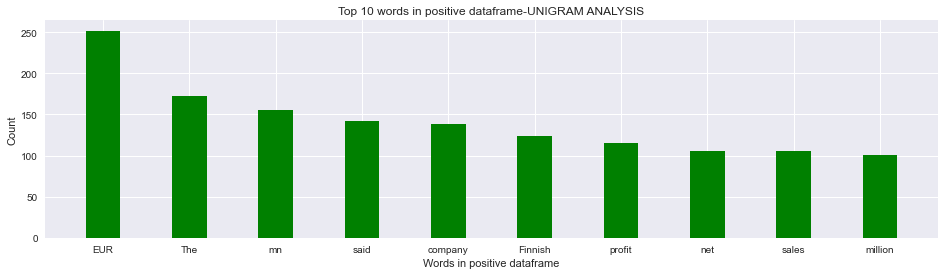

In [32]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [33]:
df_positive.head(10)

,0,1
0,EUR,252
1,The,172
2,mn,156
3,said,142
4,company,139
5,Finnish,124
6,profit,115
7,net,106
8,sales,105
9,million,101


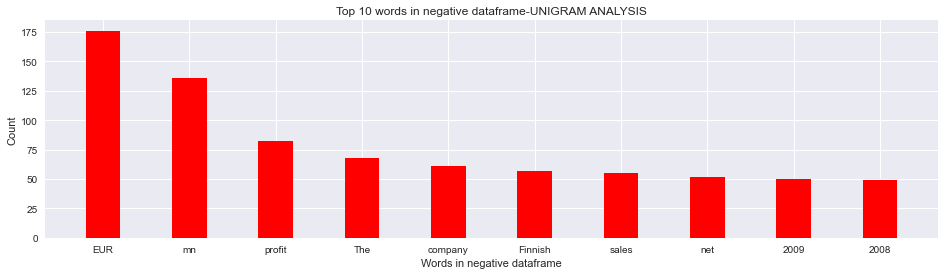

In [34]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [35]:
df_negative.head(10)

,0,1
0,EUR,176
1,mn,136
2,profit,82
3,The,68
4,company,61
5,Finnish,57
6,sales,55
7,net,52
8,2009,50
9,2008,49


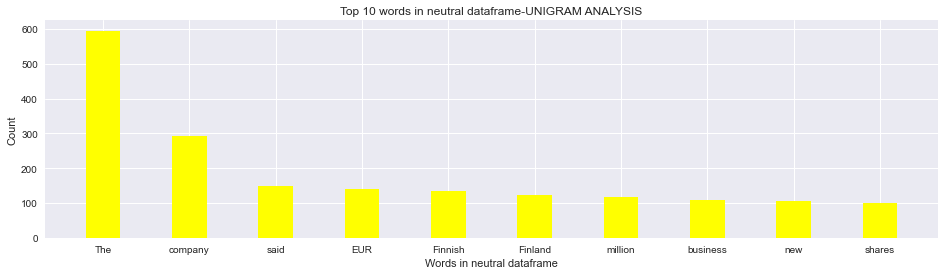

In [36]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [37]:
df_neutral.head(10)

,0,1
0,The,595
1,company,293
2,said,148
3,EUR,140
4,Finnish,135
5,Finland,123
6,million,118
7,business,110
8,new,106
9,shares,101


**Creating bigrams**

In [38]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,2):
        neutralValues2[word]+=1

Sentence after removing stopwords: ['Cargotec', 'Corporation', '', 'Press', 'Release', '', 'April', '28', '', '2008', '200', 'pm', 'Finnish', 'time', 'Cargotec', 'MacGREGOR', 'business', 'area', 'providing', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'received', 'significant', 'hatch', 'cover', 'orders', 'bulk', 'carriers', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Feb', '25', '', '2009', '', 'Finnish', 'printed', 'circuit', 'board', 'PCB', 'maker', 'Aspocomp', 'Group', 'Oyj', 'HEL', '', 'ACG1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '300000', 'USD', '385000', '2008', 'versus', 'net', 'loss', 'EUR', '653', 'million']
Sentence after removing stopwords: ['Finnish', 'security', 'privacy', 'software', 'solutions', 'developer', 'Stonesoft', 'Oyj', 'said', 'January', '7', '', '2008', 'preliminary', 'sales', 'StoneGate', 'products', 'grew', '59', 'pct', 'yearonyear', '36', 'mln', 'euro', '', '', '53', 'mln', '', 'fourth', 'quarter

Sentence after removing stopwords: ['KAUKOTELKO', 'LTD', 'PRESS', 'RELEASE', '19062007', 'AT', '1400', '1', '', '1', '', 'Telko', 'Group', '', 'KaukoTelko', '', 'expanding', 'strategic', 'partnership', 'BP', 'Industrial', 'Lubricants', '', 'Services', '', 'BP', 'ILS', '', 'acquiring', 'total', 'ownership', 'BP', 'Swedish', 'retail', 'company', '', 'MolubAlloy', 'AB', '']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'said', 'today', 'frame', 'contract', '', 'valued', 'EUR2m', '', 'implement', 'next', 'phase', 'insurance', 'application', 'South', 'African', 'Mutual', '', 'Federal', 'Insurance', 'Company', 'Limited', 'MF', '']
Sentence after removing stopwords: ['Pearl', 'Plaza', 'LLC', '', 'joint', 'venture', 'SRV', 'Shanghai', 'Industrial', 'Investment', 'Holdings', 'Co', 'Ltd', '', 'concluded', 'investment', 'decision', 'construction', 'first', 'phase', 'shopping', 'center', 'Saint', 'Petersburg', '', 'Russia', '']
Sentence after remov

Sentence after removing stopwords: ['Finnish', 'handling', 'systems', 'company', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'said', 'today', 'EUR', '13', 'million', '', 'USD', '166', '', 'contract', 'deliver', 'MacGregor', 'hatch', 'covers', 'ships', 'ordered', 'Norwegian', 'shipowner', 'Grieg', 'Shipping', '']
Sentence after removing stopwords: ['The', 'parties', 'also', 'agreed', 'options', 'allow', 'UH', 'extensively', 'implement', 'later', 'also', 'functionalities', 'human', 'resources', 'management', '']
Sentence after removing stopwords: ['HELSINKI', '', 'AFX', '', '', 'Metso', 'said', 'upgrade', 'one', 'UPMKymmene', 'four', 'paper', 'machines', 'latter', 'mill', 'Jaemsaenkoski', 'new', 'coating', 'color', 'supply', 'system', '', 'machine', 'process', 'controls', 'quality', 'measurements', '']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '98', 'mn', '', 'compared', 'loss', 'EUR', '127', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing 

Sentence after removing stopwords: ['Production', 'capacity', 'increase', '36', '000', '85', '000', 'tonnes', 'per', 'year', 'raw', 'material', 'continue', 'recycled', 'paper', 'board', '']
Sentence after removing stopwords: ['TeliaSonera', 'leading', 'telecommunications', 'company', 'Nordic', 'Baltic', 'regions', '']
Sentence after removing stopwords: ['Satama', 'net', 'profit', 'third', 'quarter', '2007', 'rose', '275000', 'euro', '', '', '395000', '', '270000', 'euro', '', '', '388000', '', 'period', '2006', '']
Sentence after removing stopwords: ['In', 'JanuarySeptember', '2007', '', 'group', 'net', 'sales', 'continuing', 'operations', 'rose', 'EUR', '2131', 'mn', 'EUR', '1726', 'mn', 'corresponding', 'period', '2006', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing', 'advanced', 'fuel', 'couple', 'weeks', '']
Sentence after removing stopwords: ['', 'UPMKymmene', 'upgraded', '', 'inline', '', '', 'underperform', '', 'Goldman'

Sentence after removing stopwords: ['3', 'February', '2011', '', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', '', 'TLT1V', 'said', 'yesterday', 'net', 'profit', 'rocketed', 'EUR4', '8', '2010', 'EUR416', '000', '2009', 'lifted', 'dividend', 'proposal', '']
Sentence after removing stopwords: ['Consolidated', 'net', 'sales', 'increased', '16', '', 'reach', 'EUR74', '8', '', 'operating', 'profit', 'amounted', 'EUR0', '9', 'compared', 'loss', 'EUR0', '7', 'prior', 'year', 'period', '']
Sentence after removing stopwords: ['The', 'company', 'anticipates', 'turnover', 'whole', '2010', 'surpass', 'previous', 'year', 'EUR', '671', 'million', '']
Sentence after removing stopwords: ['Finnish', 'steel', 'maker', 'Rautaruukki', 'Oyj', '', 'HEL', '', 'RTRKS', '', '', 'Ruukki', '', 'said', 'today', 'net', 'loss', 'contracted', 'EUR', '49', 'million', '', 'USD', '682', '', 'first', 'nine', 'months', '2010', 'EUR', '229', 'million', 'period', 'year', 

Sentence after removing stopwords: ['Metrics', 'QPR', 'ScoreCard', 'support', 'date', '', 'text', 'milestonebased', 'values', '', 'improve', 'support', 'managing', 'projects', 'around', 'performance', 'processrelated', 'content', '']
Sentence after removing stopwords: ['EuroChem', 'CFO', 'Andrey', 'Ilyin', 'said', '', '', 'This', 'facility', 'marks', 'another', 'important', 'step', 'EuroChem', 'securing', 'longterm', 'financing', 'necessary', 'potash', 'strategic', 'projects', '', '']
Sentence after removing stopwords: ['The', 'company', 'still', 'expects', 'turnover', '2010', 'slightly', 'increase', 'level', '2009', '', 'adding', '', 'market', 'predictability', 'still', 'poor', 'trustworthy', 'forecasts', 'market', 'development', 'contract', 'manufacturing', 'business', 'current', 'year', '', '']
Sentence after removing stopwords: ['Fullyear', 'net', 'sales', 'expected', 'increase', 'approximately', '10', '', '', 'company', 'said', '']
Sentence after removing stopwords: ['Cision', 'sa

Sentence after removing stopwords: ['Atria', 'launch', 'campaign', 'September', 'promote', 'CampoMos', 'brand', 'Moscow', 'market', '', 'said', '']
Sentence after removing stopwords: ['Again', '', 'significant', 'sales', 'increase', '186', '', 'Russia', '']
Sentence after removing stopwords: ['', 'The', 'priority', '2009', 'strengthen', 'company', 'balance', 'sheet', 'increase', 'cash', 'flow', '', '', 'CEO', 'Hannu', 'Krook', 'said', '']
Sentence after removing stopwords: ['Growth', 'strongest', 'FSecure', 'operator', 'ISPs', '', 'mobile', 'operators', 'cable', 'operators', 'business', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '32', 'mn', 'EUR', '10', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Mika', 'Stahlberg', '', 'VP', 'FSecure', 'Labs', '', 'said', '', '', 'We', 'excited', 'proud', 'FSecure', 'recognized', 'AVComparatives', 'Product', 'Year', '']
Sentence after removing stopwords: ['Finnish', 'OKO', 'bank'

Sentence after removing stopwords: ['Dubbed', 'Nokia', 'Money', 'Solutions', '', 'company', 'officials', 'say', 'initiative', 'would', 'seek', 'bridge', 'gap', 'banked', 'unbanked', 'developing', 'countries', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '70', 'mn', '', 'loss', 'EUR', '40', 'mn', 'second', 'quarter', '2009', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '830', 'mn', '', 'EUR', '235', 'mn', 'yearonyear', '']
Sentence after removing stopwords: ['Sales', 'increased', 'due', 'growing', 'market', 'rates', 'increased', 'operations', '']
Sentence after removing stopwords: ['LONDON', 'AFX', '', 'Shares', 'Rautaruukki', 'Corp', 'upgraded', '', 'hold', '', '', 'sell', '', 'ABN', 'Amro', '', 'price', 'target', 'raised', '2575', 'eur', '145', '', 'said', 'dealers', '']
Sentence after removing stopwords: ['EPS', 'continuing', 'operations', 'came', '030', 'eur', '', '017', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'amounted', 'EUR0', '03', '', 'loss', 'EUR0', '08', '']
Sentence after removing stopwords: ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords: ['Altimo', 'TeliaSonera', 'said', 'yesterday', 'Usmanov', 'would', 'welcome', 'join', 'new', 'company', '']
Sentence after removing stopwords: ['Nokia', 'Multimedia', 'net', 'sales', 'totaled', 'EUR', '57', 'bn', '', '45', '', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['', 'Consumers', 'well', 'received', 'packed', 'fresh', 'meat', '']
Sentence after removing stopwords: ['Operating', 'profit', 'margin', 'increased', '112', '', '117', '', '']
Sentence after removing stopwords: ['The', 'bank', 'sees', 'potential', 'Getinge', 'share', 'rise', '']
Sentence after removing stopwords: ['Neste

Sentence after removing stopwords: ['In', 'addition', 'demand', 'Finland', '', 'export', 'lining', 'stone', 'products', 'also', 'increased', '']
Sentence after removing stopwords: ['Efore', 'presence', 'also', 'opens', 'new', 'interesting', 'development', 'opportunities', 'students', '', '', 'dean', 'Faculty', 'Electronics', '', 'Communications', 'Automation', 'TKK', 'said', '']
Sentence after removing stopwords: ['The', 'Dutch', 'broker', 'noted', 'Nokian', 'Tyres', 'reported', 'good', 'first', 'quarter', '2006', '', 'line', 'consensus', '']
Sentence after removing stopwords: ['EuroChem', 'Head', 'Corporate', 'Finance', 'Alexander', 'Gavrilov', 'said', '', '', 'I', 'pleased', 'confirmed', 'EuroChem', 'able', 'attract', 'longterm', 'funds', 'attractive', 'rates', '']
Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
Sent

Sentence after removing stopwords: ['Diluted', 'loss', 'per', 'share', 'stood', 'EUR', '015', 'versus', 'EUR', '026', '']
Sentence after removing stopwords: ['', 'Installation', 'automatic', 'varnishing', 'line', 'important', 'part', 'company', 'strategy', 'region', 'central', 'eastern', 'Europe', '', '', 'said', 'Jozef', 'Misurec', '', 'director', 'Ruukki', 'Slovakia', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['Altia', 'operating', 'profit', 'jumped', 'EUR', '47', 'million', 'EUR', '66', 'million', '']
Sentence after removing stopwords: ['Ruukki', 'signed', 'contract', 'Norwegian', 'company', 'Veidekke', 'Entreprenor', 'AS', '']
Sentence after removing stopwords: ['Foundries', 'division', 'reports', 'sales', 'increased', '97', '', 'EUR', '631', 'mn', 'EUR', '575', 'mn', '

Sentence after removing stopwords: ['These', 'moderate', 'significant', 'changes', 'resulted', 'significant', '2432', '', 'reduction', 'estimated', 'CVD', 'risk', '']
Sentence after removing stopwords: ['The', 'pretax', 'profit', 'group', 'life', 'insurance', 'business', 'increased', 'EUR', '36', 'million', 'EUR', '27', 'million', '']
Sentence after removing stopwords: ['EBIT', 'totalled', 'EUR', '144', 'mn', '', 'compared', 'loss', 'EUR', '03', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Vacon', 'cash', 'flow', 'operations', 'grew', 'EUR', '371', 'mn', 'EUR', '219', 'mn', 'year', 'ago', '']
Sentence after removing stopwords: ['SCANIA', 'Morgan', 'Stanley', 'lifted', 'share', 'target', 'Swedish', 'heavyduty', 'truck', 'bus', 'maker', 'Scania', 'AB', '330', 'crowns', '', '', '424', '', '352', 'euro', '', '310', 'crowns', '', '', '398', '', '331', 'euro', '', '']
Sentence after removing stopwords: ['Airbus', '100', 'firm', 'orders', 'A350', '89', 'no

Sentence after removing stopwords: ['In', 'January', '', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'went', '32', '', 'capacity', '', 'measured', 'available', 'seat', 'kilometres', 'ASK', '', 'rose', '122', '', '']
Sentence after removing stopwords: ['Finnish', 'technology', 'group', 'Aspocomp', 'Group', 'Oyj', '', 'OMX', 'Helsinki', '', 'ACG1V', '', 'issued', 'third', 'quarter', 'report', 'Thursday', '', '13', 'November', '', '', 'posting', 'operating', 'profit', 'EUR0', '4', '', 'compared', 'loss', 'EUR0', '5', 'third', 'quarter', '2007', '']
Sentence after removing stopwords: ['Iggesunds', 'Bruk', 'Sweden', 'one', 'advanced', '', 'fully', 'integrated', 'pulp', 'paperboard', 'mills', 'world', '']
Sentence after removing stopwords: ['The', 'diluted', 'loss', 'per', 'share', 'narrowed', 'EUR', '027', 'EUR', '086', '']
Sentence after removing stopwords: ['Sales', 'Department', 'Store', 'Division', 'increased', '15', '', 'sales', 'clothing', 'store', 'sub

Sentence after removing stopwords: ['Finnish', 'Raisio', '', 'Diagnostics', '', 'launching', 'new', 'DNAbased', 'quick', 'tests', 'ensure', 'safety', 'food', '']
Sentence after removing stopwords: ['Airvana', 'UMTS', 'Home', 'Base', 'Station', 'femto', 'cell', 'uses', 'softwarebased', 'functionality', 'offtheshelf', 'silicon', 'accelerate', 'feature', 'development', 'reduce', 'product', 'cost', '']
Sentence after removing stopwords: ['The', 'diesel', 'margin', 'remained', 'high', '']
Sentence after removing stopwords: ['The', 'completion', 'recycling', 'plant', 'important', 'link', 'chain', 'creating', 'waste', 'management', 'system', 'Dubna', 'region', 'meets', 'EU', 'standards', '']
Sentence after removing stopwords: ['The', 'original', 'name', 'Componenta', 'ml', '', 'subsidiary', 'Finnish', 'Componenta', 'Group', '', 'changed', 'ml', 'Components', 'company', 'seen', '63', '', 'growth', 'Q1', '2010', '', 'comparison', 'Q1', '2009', '']
Sentence after removing stopwords: ['First', 'q

Sentence after removing stopwords: ['The', 'company', 'said', 'sales', 'three', 'months', 'end', 'March', 'slid', 'EUR86', '4', 'US', '1134', 'EUR91', '2', 'last', 'year', '']
Sentence after removing stopwords: ['Publishing', 'Sweden', 'operating', 'loss', 'EUR', '11', 'mn', 'Q1', '2009', '', 'compared', 'profit', 'EUR', '06', 'mn', 'year', 'ago', '']
Sentence after removing stopwords: ['However', '', 'company', 'saw', 'net', 'profit', 'third', 'quarter', 'EUR1', '4', 'EUR1', '5', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['', 'We', 'cut', 'frequency', 'New', 'York', 'last', 'year', '', 'explains', 'fall', '', '', 'said', '']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'comfort', 'zone', '']
Sentence after removing stopwords: ['The', 'acquisition', 'landsbanken', 'Sverige', '2009', 'burdened', 'performance', 'EUR', '30', 'mn', '']
Sentence afte

Sentence after removing stopwords: ['Swedbank', 'shares', 'hardest', 'hit', 'Swedish', 'banks', 'ongoing', 'international', 'financial', 'crisis', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'taxes', 'fell', 'EUR', '211', 'mn', 'third', 'quarter', '2008', '', 'compared', 'EUR', '358', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'profit', 'EUR', '22', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['EB', 'announced', 'stock', 'exchange', 'release', 'November', '18th', '2008', 'JT', 'Bergqvist', 'resigned', 'chairmanship', 'membership', 'Board', 'EB', '']
Sentence after removing stopwords: ['Based', 'first', 'quarter', 'result', '', 'existing', 'order', 'backlog', 'new', 'order', 'prospects', '', 'company', 'expects', 'fullyear', 'sales', 'contract', '25', '', '2008', '', 'gross', 'margin', 'stay', 'healthy', 'level', '', 'operating'

Sentence after removing stopwords: ['Most', 'permanent', 'layoffs', 'plywood', 'sawn', 'timber', 'sectors', 'Finnish', 'company', 'operations', 'several', 'domestic', 'mills', '', 'earlier', 'year', 'temporarily', 'laid', '1200', 'workers', 'save', 'costs', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '67', 'mn', '', 'EUR', '72', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['As', 'result', '', '12', 'people', 'made', 'redundant', 'total', '67', 'persons', 'laid', 'temporarily', '']
Sentence after removing stopwords: ['Prices', 'delivery', 'volumes', 'broadband', 'products', 'decreased', 'significantly', '2005', '']
Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '25mn', 'compared', 'profit', 'EUR', '63mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['LT', 'net', 'profit', 'whole', '2010', 'dropped', 'EUR', '36', 'million', 'EUR', '45', 'million', '2009', '']

Sentence after removing stopwords: ['A', 'total', '165', 'mn', 'passenger', 'ship', 'journeys', 'took', 'place', 'northern', 'Baltic', 'Sea', '2007', '', 'slightly', '165', 'mn', '2006', '']
Sentence after removing stopwords: ['ADPnews', '', 'Aug', '3', '', '2009', '', 'Finnish', 'media', 'group', 'IlkkaYhtyma', 'Oyj', 'HEL', '', 'ILK2S', 'said', 'today', 'net', 'profit', 'fell', '45', '', 'year', 'EUR', '59', 'million', 'USD', '84', 'first', 'half', '2009', '']
Sentence after removing stopwords: ['On', 'hand', '', 'Finnish', 'sawmills', '', 'production', 'decreased', 'even', '']
Sentence after removing stopwords: ['20', 'October', '2010', '', 'Finnish', 'environmental', 'management', 'company', 'Lassila', '', 'Tikanoja', 'Oyj', 'HEL', '', 'LAT1V', '', 'LT', '', 'said', 'Monday', 'expects', 'operating', 'profit', '', 'excluding', 'nonrecurring', 'items', '', 'whole', '2010', 'slightly', 'lower', '2009', '']
Sentence after removing stopwords: ['', 'Adjustment', 'fall', 'price', 'level',

Sentence after removing stopwords: ['Since', 'association', 'data', 'cover', 'sales', 'figures', '100', 'small', 'local', 'breweries', 'sales', 'imported', 'beer', 'products', '', 'actual', 'market', 'shares', 'members', 'smaller', 'given', 'report', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', 'said', 'secondquarter', 'result', 'would', 'fall', 'half', 'compared', 'period', '2007', '']
Sentence after removing stopwords: ['Operating', 'profit', '2009', 'lower', 'outlook', 'published', 'earlier', '']
Sentence after removing stopwords: ['The', 'poorest', 'index', 'figure', 'given', 'Finnish', 'power', 'company', 'Fortum', '', '45', '']
Sentence after removing stopwords: ['ADPnews', '', 'Feb', '5', '', '2010', '', 'Finnish', 'real', 'estate', 'investor', 'Sponda', 'Oyj', 'HEL', '', 'SDA1V', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '815', 'million', 'USD', '118', '2009', 'profit', 'EUR', '293', 'million', '2008', '']
Sentence after removing stopwords: ['Operatin

Sentence after removing stopwords: ['', 'Operating', 'profit', 'declined', 'mainly', 'due', 'increased', 'cost', 'wood', 'recycled', 'fiber', 'strengthened', 'euro', '', '']
Sentence after removing stopwords: ['In', 'first', 'half', '2008', '', 'Bank', 'operating', 'profit', 'fell', 'EUR', '118', 'mn', 'EUR', '189', 'mn', '', 'net', 'interest', 'income', 'increased', 'EUR', '209', 'mn', 'EUR', '188', 'mn', 'first', 'half', '2007', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '151', 'mn', 'EUR', '246', 'mn', '2006', '']
Sentence after removing stopwords: ['UPM', 'said', 'move', 'lower', 'net', 'profit', '', 'x20ac', '385', 'million', 'US', '520', 'million', 'second', 'quarter', '', 'mainly', 'due', 'impairment', 'charges', '']
Sentence after removing stopwords: ['', 'This', 'super', 'nasty', '', '', 'said', 'Eric', 'Schultze', '', 'chief', 'technology', 'officer', 'Shavlik', 'Technologies', 'LLC', '', 'St', 'Paul', '', 'Minnbased', 'maker', 'patch', 'man

Sentence after removing stopwords: ['The', 'value', 'deal', 'estimated', 'SEK25m', 'SEK50m', '']
Sentence after removing stopwords: ['The', 'secondquarter', 'net', 'sales', 'expected', 'par', 'first', 'quarter', '2009', '']
Sentence after removing stopwords: ['He', 'joined', 'Rautakirja', '1997', 'lead', 'one', 'four', 'business', 'areas', 'took', 'position', 'President', 'CEO', '2001', '']
Sentence after removing stopwords: ['Feed', 'companies', 'Suomen', 'Rehu', 'Raisio', 'import', 'GMO', 'feed', '']
Sentence after removing stopwords: ['', 'After', 'transaction', '', 'Tikkurila', 'powder', 'coatingsrelated', 'operations', '', '', 'company', 'said', '']
Sentence after removing stopwords: ['Companies', 'evaluated', 'report', 'include', 'Aladdin', '', 'CA', '', 'FSecure', '', 'Kaspersky', '', 'Marshal', '', 'McAfee', '', 'Microsoft', '', 'Panda', '', 'Proofpoint', '', 'Sophos', '', 'Symantec', '', 'Trend', 'Micro', '', 'Tumbleweed', '', 'Websense', '']
Sentence after removing stopwords:

Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR9', '6', 'net', 'sales', 'increased', 'EUR69', '0', '', 'compared', '2005', '']
Sentence after removing stopwords: ['The', 'investment', 'would', 'EUR5m', '']
Sentence after removing stopwords: ['Simmons', 'Elected', 'DCUC', 'Chairman', 'PORTSMOUTH', '', 'NHGordon', 'A', 'Simmons', '', 'CEO', 'Service', 'Credit', 'Union', '', 'elected', 'chairman', 'Defense', 'Credit', 'Union', 'Council', '20072008', 'term', '']
Sentence after removing stopwords: ['The', 'repo', 'rate', 'gradually', 'reach', '2', '', 'end', '2010', '', 'according', 'Nordea', 'Economic', 'Outlook', '']
Sentence after removing stopwords: ['The', 'acquisition', 'expected', 'take', 'place', 'end', 'August', '2007', '']
Sentence after removing stopwords: ['Nokia', 'Siemens', 'Networks', 'provides', 'mobile', 'fixed', 'network', 'infrastructure', '', 'communications', 'networks', 'service', 'platforms', '', 'well', 'professional'

Sentence after removing stopwords: ['Among', 'biggest', 'Christmas', 'sellers', '', '35', 'satin', 'bow', 'shift', 'dress', 'styled', 'outfits', 'worn', 'Victoria', 'Beckham', '', '75', 'Paris', 'Hilton', 'Prom', 'dress', '']
Sentence after removing stopwords: ['In', '2007', '', 'Etteplan', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['As', 'part', 'reorganization', '', 'KaukoTelko', 'Ltd', 'divided', 'Telko', 'Ltd', '', 'Leipurin', 'Ltd', '', 'Hamina', 'Terminal', 'Services', 'Ltd', 'Kaukomarkkinat', 'Ltd', '']
Sentence after removing stopwords: ['Vacon', 'controls', '5', '', 'company', 'via', 'investment', 'fund', 'Power', 'Fund', 'I', 'EUR', '10', '', 'USD', '1397']
Sentence after removing stopwords: ['The', 'seats', 'would', 'go', 'Edgar', 'Edmonds', '', 'American', 'experience', 'clothing', 'retail', 'industry', '', 'Christian', 'Fischer', '', 'Austrian', 'experience', 'winter', 'sports', 'goods', 'business', '']
Sentence after removing stopwords: ['The', 'Tecnom

Sentence after removing stopwords: ['The', 'decision', 'reflects', 'underutilisation', 'line', '', 'produces', 'nonwovens', 'used', 'medical', 'wipes', 'applications', 'well', 'automotive', 'industry', '']
Sentence after removing stopwords: ['', 'Lemminkainen', 'Talo', 'Oy', 'Lahti', 'office', 'significant', 'logistics', 'business', 'premises', 'constructor', '']
Sentence after removing stopwords: ['The', 'trucks', 'feature', 'Eco', 'Drive', 'system', '', 'fuel', 'measuring', 'tool', 'stores', 'data', 'particular', 'individual', 'drivers', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['Metsaliitto', 'sell', '11', 'million', 'B', 'shares', 'Neomarkka', '', 'accounting', '183', 'pct', 'Neomarkka', 'equity', '127', 'pct', 'voting', 'rights', '']
Sentenc

Sentence after removing stopwords: ['The', 'hull', 'vessel', 'built', 'one', 'block', 'time', 'Ruukki', 'delivered', 'plate', 'material', 'block', 'construction', 'progressed', '']
Sentence after removing stopwords: ['Finnish', 'property', 'investment', 'company', 'Citycon', 'expand', 'refurbish', 'kersberga', 'shopping', 'center', 'Stockholm', '', 'Sweden', '']
Sentence after removing stopwords: ['', 'Cash', 'flow', 'operating', 'activities', 'investments', 'EUR', '76', 'million', 'EUR', '25', 'million', '']
Sentence after removing stopwords: ['CapMan', 'made', 'initial', 'investment', 'OneMed', 'June', '2006', '']
Sentence after removing stopwords: ['A', '2001', 'agreement', 'expired', 'earlier', 'month', '']
Sentence after removing stopwords: ['In', 'financial', 'statement', 'first', 'quarter', '2010', '', 'Tikkurila', 'reported', 'discontinued', 'operations', '']
Sentence after removing stopwords: ['Previously', '', 'Grimaldi', 'held', '4643', 'pct', 'stake', 'Finnish', 'company', 

Sentence after removing stopwords: ['The', 'company', 'plans', 'spend', 'proceeds', 'rights', 'offering', 'strengthening', 'balance', 'sheet', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'contract', 'EUR', '8', 'million', '']
Sentence after removing stopwords: ['The', 'Finnish', 'food', 'concern', 'Atria', 'acquire', 'two', 'Estonian', 'meat', 'processing', 'companies', '', 'Woro', 'Kommerts', 'VastseKuuste', 'Lihatoostus', '', 'reported', 'Official', 'website', 'wwwinvestinestoniacom', '']
Sentence after removing stopwords: ['Niina', 'Nenonen', '', 'Marimekko', 'current', 'director', 'clothing', '', 'bags', 'accessories', 'lines', '', 'take', 'role', '']
Sentence after removing stopwords: ['In', 'Asia', 'earlier', '', 'Japan', 'Nikkei', 'index', 'fell', '062', 'percent', 'Hong', 'Kong', 'Hang', 'Seng', 'Index', 'rose', '056', 'percent', '']
Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', 'Ltd', '', 'subsidiary', 'Incap'

Sentence after removing stopwords: ['CF2', 'Pty', 'Ltd', 'became', 'substantial', 'holder', 'Renison', 'Consolidated', 'Mines', 'NL', 'January', '25', '150', 'million', 'shares', '', '79', 'pc', '', '']
Sentence after removing stopwords: ['It', 'use', 'proceeds', 'transaction', 'achieve', 'target', '']
Sentence after removing stopwords: ['Finnish', 'Bank', 'land', 'launch', 'longterm', 'pension', 'savings', 'account', 'beginning', 'June', '2010', '']
Sentence after removing stopwords: ['The', 'Marubeni', 'Group', 'focuses', 'creating', '', 'value', 'chain', '', 'upstream', 'downstream', '', 'encompassing', 'wide', 'variety', 'business', 'fields', '', 'including', 'oil', '', 'gas', '', 'metals', '', 'mineral', 'resources', '', 'foods', '', 'pulp', '', 'paper', 'chemicals', '', 'among', 'others', '']
Sentence after removing stopwords: ['Finnish', 'Honkarakenne', 'specialises', 'building', 'log', 'houses', 'planning', 'use', 'pine', 'Russian', 'Karelia', '']
Sentence after removing stopwo

Sentence after removing stopwords: ['Sanoma', 'also', 'Executive', 'Committee', '', 'accordance', 'Company', 'Articles', 'Association', '', 'prepares', 'proposals', 'matters', 'decided', 'noted', 'Board', 'Directors', '']
Sentence after removing stopwords: ['According', '', 'construction', 'work', 'start', 'spring', '2007', '', 'facility', 'commissioned', 'spring', '2008', '']
Sentence after removing stopwords: ['A', 'Flurry', 'Analytics', 'spokesperson', 'said', '', 'measuring', 'Windows', 'Phone', '7', 'data', 'weeks', '', 'firm', 'doublechecked', 'data', 'make', 'sure', '66', 'per', 'cent', 'rise', 'aberration', '']
Sentence after removing stopwords: ['Due', 'Pirkka', 'beer', '', 'Olvi', 'brewery', 'Iisalmi', 'moving', '7day', '', '24hour', 'work', 'shifts', '']
Sentence after removing stopwords: ['Stock', 'Exchange', 'Release', '1032011', '1200', 'Sanoma', 'published', 'Annual', 'Report', 'Financial', 'Statements', '2010', 'first', 'Corporate', 'Responsibility', 'Report', '']
Sente

Sentence after removing stopwords: ['The', 'writing', 'publication', 'LemminkÆinen', '\x93', 'history', 'continuation', 'earlier', 'collaboration', 'Antti', 'Tuuri', 'company', '']
Sentence after removing stopwords: ['', 'So', '', 'sales', 'growth', 'cars', 'considerably', 'influence', 'tires', 'market', '', '']
Sentence after removing stopwords: ['The', 'effect', 'savings', 'noticeable', 'beginning', '2010', '']
Sentence after removing stopwords: ['This', 'could', 'us', 'time', '', '', 'said', '']
Sentence after removing stopwords: ['He', 'Chartered', 'Accountant', 'British', 'Columbia', 'Alberta', 'well', 'Certified', 'Public', 'Accountant', 'Washington', 'State', '']
Sentence after removing stopwords: ['Incap', 'Corporation', 'Stock', 'Exchange', 'Release', '4', 'May', '2010', '830', 'INCAP', 'CORPORATION', 'S', 'DIRECTED', 'SHARE', 'ISSUE', 'WAS', 'SUBSCRIBED', 'IN', 'FULL', 'The', 'Board', 'Incap', 'Corporation', 'approved', 'subscriptions', 'directed', 'share', 'issue', '']
Sente

Sentence after removing stopwords: ['The', 'options', 'might', 'include', 'partial', 'total', 'divestment', 'shareholdings', 'Ovako', '']
Sentence after removing stopwords: ['NWC', 'ANALYSIS', '']
Sentence after removing stopwords: ['Financing', 'project', 'come', 'mainly', 'China', '']
Sentence after removing stopwords: ['It', 'also', 'confirmed', 'earnings', 'guidance', 'whole', '2009', 'issued', 'report', 'whole', '2008', '']
Sentence after removing stopwords: ['Country', '', '', 'Finland', 'Sector', '', 'ConstructionReal', 'Estate', 'Target', '', 'Pohjolan', 'DesignTalo', 'Oy', 'Buyer', '', 'CapMan', 'Oyj', 'Vendor', '', 'Ruukki', 'Group', 'Oyj', 'Deal', 'size', 'USD', '', '1026', 'Type', '', 'Divestment', 'Status', '', 'Agreed']
Sentence after removing stopwords: ['The', 'retail', 'chain', 'launched', '2007', 'correspond', 'profit', 'sales', 'forecasts', 'company', '']
Sentence after removing stopwords: ['The', 'implementation', 'deal', 'subject', 'approval', 'Finnish', 'Competiti

Sentence after removing stopwords: ['The', 'composite', 'body', 'coated', 'hard', 'coating', 'layer', 'produced', 'thermal', 'spraying', '', 'coating', 'ground', '', '']
Sentence after removing stopwords: ['Okmetic', 'Board', 'Directors', 'also', 'decided', 'new', 'share', 'ownership', 'program', 'directed', 'company', 'top', 'management', '']
Sentence after removing stopwords: ['Finnish', 'heatretaining', 'fireplaces', 'maker', 'Tulikivi', 'Oyj', 'said', 'August', '29', '', '2007', 'local', 'tiled', 'stoves', 'utility', 'ceramics', 'subsidiary', 'Kermansavi', 'Oy', 'merge', 'Tulikivi', 'means', 'absorption', 'order', 'streamline', 'latest', 'corporate', 'structure', '']
Sentence after removing stopwords: ['For', '2009', '', 'Incap', 'expects', 'revenue', 'EUR', '70', 'million', '']
Sentence after removing stopwords: ['Telecom', 'foreign', 'investment', 'limit', '74', '', '', 'appears', 'mobile', 'VAS', '', 'means', 'Tecnomen', 'pick', 'much', '966', '', '']
Sentence after removing sto

Sentence after removing stopwords: ['The', 'prerequisite', 'inclusion', 'program', 'receipt', 'gains', 'key', 'employees', 'acquire', 'Aspo', 'shares', 'amount', 'determined', 'Board', 'advance', '', 'maximum', '']
Sentence after removing stopwords: ['In', 'volume', '', 'focus', 'already', 'outside', 'Finland', '', '60', '', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['City', 'CU', 'Welcomes', 'DART', 'Members', 'DALLASCity', 'CU', 'welcomes', 'members', 'DART', 'FCU', 'merge', 'City', 'CU', '']
Sentence after removing stopwords: ['Body', 'The', 'credit', 'falls', 'due', 'February', '24', '', '2014', '']
Sentence after removing stopwords: ['GeoSentric', 'acquiring', 'extra', 'financing', 'issuing', 'maximum', '220000', 'new', 'shares', 'convertible', 'bond', 'subscription', 'rights', '880000', 'shares', '', 'fully', 'subscribed', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'deployment', 'Danish', '4

Sentence after removing stopwords: ['While', 'company', 'indicate', 'level', 'investment', 'unit', '', 'said', 'purchased', 'equipment', 'Nokia', 'Corporation', 'mobile', 'phone', 'RD', 'laboratory', 'Jyvaeskylae', '']
Sentence after removing stopwords: ['CHS', 'Expo', 'Freight', 'major', 'Finnish', 'fair', '', 'exhibition', 'culture', 'logistics', 'company', 'provides', 'logistics', 'services', 'various', 'events', 'land', '', 'air', 'sea', '']
Sentence after removing stopwords: ['Approval', 'shareholders', 'Cencorp', 'accordance', 'Finnish', 'law', '']
Sentence after removing stopwords: ['Inha', 'Works', 'invested', 'product', 'development', 'market', 'research', '']
Sentence after removing stopwords: ['Amanda', 'Capital', 'investments', '22', 'private', 'equity', 'funds', '200', 'unquoted', 'companies', 'mainly', 'Europe', '']
Sentence after removing stopwords: ['900', 'EET', 'Alma', 'Media', 'Annual', 'Report', '2009', 'scheduled', 'published', 'calendar', 'week', '9', '']
Sentence

Sentence after removing stopwords: ['Latin', 'America', 'currently', 'accounts', 'approximately', '40', '', 'sales', 'Tecnotree', '', 'company', 'president', 'CEO', 'Eero', 'Mertano', 'recently', 'told', 'BNamericas', '']
Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'expire', '30', 'September', '2007', '']
Sentence after removing stopwords: ['According', 'TyrvÆinen', 'estimation', '', 'Japan', 'essential', 'location', 'terms', 'Finnair', 'Asian', 'strategy', '']
Sentence after removing stopwords: ['Aspo', 'also', 'investigated', 'sales', 'opportunities', 'Kaukomarkkinat', 'electronics', 'business', '']
Sentence after removing stopwords: ['', 'These', 'tests', 'part', 'larger', 'campaign', 'includes', 'various', 'customer', 'trials', 'demonstrations', 'make', 'LTE', '800', 'MHz', 'commercially', 'viable', 'summer', '', '', 'Nokia', 'Siemens', 'head', 'LTE', 'business', 'line', '', 'Reino', 'Tammela', '', 'said', '']
Sentence after removing stopwords: ['W

Sentence after removing stopwords: ['The', 'aim', 'bridge', 'solutions', 'chosen', 'minimize', 'construction', 'times', 'ensuring', 'traffic', 'beneath', 'bridge', 'Saimaa', 'canal', 'continues', 'undisturbed', '']
Sentence after removing stopwords: ['TyrvÆinen', 'opinion', 'airline', 'repeating', 'time', 'already', '', 'however', '']
Sentence after removing stopwords: ['The', 'power', 'generated', 'annually', 'Loviisa', 'covers', '10', '', 'Finland', 'electricity', 'consumption', '']
Sentence after removing stopwords: ['In', 'Switzerland', '', 'Teleste', 'established', 'supplier', 'products', 'long', 'time', 'primary', 'customers', 'include', 'cable', 'fibertothehome', '', 'FTTH', '', 'operators', '']
Sentence after removing stopwords: ['According', 'Seikku', '', 'retail', 'sector', 'Finland', 'controlled', '34', 'large', 'actors', '', 'food', 'manufacturers', 'still', 'relatively', 'small', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Dec', '22', '', 'United',

Sentence after removing stopwords: ['Finnish', 'construction', 'company', 'YIT', 'HEL', '', 'YTY1V', 'said', 'agreed', 'take', 'German', 'facility', 'engineering', 'facility', 'systems', 'firm', 'Caverion', 'EUR73m', 'USD90', '3', '']
Sentence after removing stopwords: ['The', 'huge', 'bridge', 'girders', 'delivered', 'site', 'plant', 'Ylivieska', '', 'Finland', '']
Sentence after removing stopwords: ['Rapala', 'aims', 'move', 'distribution', 'unit', 'Ragot', 'Loudeac', 'Bretagne', 'distribution', 'unit', 'Waterqueen', 'fishing', 'line', 'supplier', 'Tortue', 'Saint', 'Marcel', 'Central', 'France', 'Morvillars', '']
Sentence after removing stopwords: ['This', 'action', 'follows', 'personnel', 'negotiations', 'concerning', 'Elcoteq', 'SE', '', 'Finnish', 'Branch', '', 'Elcoteq', 'Finland', 'Oy', 'Elcoteq', 'Design', 'Center', 'Oy', '']
Sentence after removing stopwords: ['Typical', 'enduses', 'include', 'roof', 'structures', '', 'floorings', '', 'walls', 'ceilings', '', 'nonvisible', 's

Sentence after removing stopwords: ['Panostaja', 'financially', 'secure', 'Finnish', 'multifield', 'corporation', 'creates', 'healthy', 'companies', 'company', 'entities', '']
Sentence after removing stopwords: ['The', 'port', 'facilities', '', 'throughput', '250000', 'TEUs', '75', 'mln', 'tons', 'general', 'cargo', '']
Sentence after removing stopwords: ['Pohjola', 'cooperative', 'banks', 'continued', 'combine', 'branch', 'office', 'network', '']
Sentence after removing stopwords: ['Poyry', 'Energy', 'GmbH', 'Austria', 'leading', 'engineering', 'consulting', 'company', 'energy', '', 'infrastructure', 'environment', 'sector', '', 'owned', 'Poyry', 'Plc', 'Austrian', 'Verbund', 'AG', '']
Sentence after removing stopwords: ['The', 'recruitment', 'related', 'relocation', 'Stora', 'Enso', 'research', 'operations', 'Karlstad', '', 'central', 'Sweden', '']
Sentence after removing stopwords: ['The', 'investment', 'worth', 'approximately', 'EUR', '100mn', '']
Sentence after removing stopwords:

Sentence after removing stopwords: ['It', 'difficult', 'become', 'Google', 'Analytics', 'channel', 'partner', '']
Sentence after removing stopwords: ['Cargotec', 'share', 'capital', 'increase', 'totals', 'EUR', '64299180', '']
Sentence after removing stopwords: ['The', 'uranium', 'found', 'locally', 'naturally', 'occurring', 'makes', 'sense', 'extract', 'way', 'metals', '', '']
Sentence after removing stopwords: ['The', 'total', 'scope', 'project', '38000', 'square', 'metres', 'valued', 'total', 'around', 'EUR75m', '']
Sentence after removing stopwords: ['The', 'expanded', 'agreement', 'covers', 'sale', '', 'marketing', 'distribution', 'Benefon', 'navigation', 'locator', 'devices', 'China', '']
Sentence after removing stopwords: ['Tekla', 'defense', 'business', 'employs', '20', 'persons', 'located', 'Espoo', '', 'Finland', '']
Sentence after removing stopwords: ['The', 'order', 'plywood', 'mill', 'machinery', 'equipment', 'announced', 'Finnish', 'Raute', 'September', '2006', 'delivered

Sentence after removing stopwords: ['The', 'duration', 'layoffs', 'per', 'employee', 'vary', 'one', 'six', 'weeks', '']
Sentence after removing stopwords: ['Ahlstrom', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords: ['Cameco', 'provide', 'upfront', 'investment', 'USD', '60mn', 'construction', 'uranium', 'extraction', 'circuit', '']
Sentence after removing stopwords: ['The', 'utility', 'also', 'provide', 'services', 'related', 'electricity', 'management', '', 'hedging', 'trades', 'risk', 'management', 'reporting', '']
Sentence after removing stopwords: ['Simultaneously', '', 'Alma', 'Media', 'purchased', '35', '', 'share', 'Arena', 'Interactive', '', 'subsidiary', 'Arena', 'Partners', 'focus', 'mobile', 'solutions', 'development', '']
Sentence after removing stopwords: ['The', 'total', 'project', 'duration', 'three', 'years', 'valued', 'EUR11', '5']
Sentence after removing stopwords: ['Absolut', 'Bank', 'exploring', 'possibility', 'borrowing', '']


Sentence after removing stopwords: ['KONE', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['She', 'succeed', 'Krister', 'Kylas', '', 'decided', 'leave', 'TeliaSonera', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key', 'niche', 'players', 'worldwide', 'Black', '', 'Decker', 'Corporation', '', 'Fiskars', 'Corporation', '', 'Fiskars', 'Brands', '', 'Inc', '', 'Husqvarna', 'Outdoor', 'Products', 'Inc', '', 'KS', 'Group', '', 'Ryobi', 'Technologies', '', 'Inc', '', 'The', 'Scotts', 'MiracleGro', 'Company', '', 'Van', 'Group', '', 'Inc', '']
Sentence after removing stopwords: ['As', 'condition', 'deal', '', 'Savcor', 'Alfa', 'bought', 'Photonium', 'Akseli', 'Lahtinen', 'Inc', 'business', 'operations', 'prior', 'deal', '']
Sentence after removing stopwords: ['There', '15', 'initial', 'public', 'offerings', 'announced', 'Sweden', 'year', '', 'compared', 'two', 'period', 'year', 'earlier', ''

Sentence after removing stopwords: ['In', 'spring', '2006', '', 'total', '386530', 'Stock', 'Options', '2002', 'B', 'annulled', '']
Sentence after removing stopwords: ['Aktia', 'forecasts', 'Finland', 'inflation', '11', '', '2010', '']
Sentence after removing stopwords: ['Berling', 'Capital', '', 'Umo', 'Capital', 'Veikko', 'Laine', 'biggest', 'shareholders', 'Amanda', 'Capital', '']
Sentence after removing stopwords: ['According', 'CapMan', 'Plc', 'Corporate', 'Governance', '', 'majority', 'committees', '', 'members', 'shall', 'independent', 'Company', '']
Sentence after removing stopwords: ['Unbelievably', '', 'company', 'makes', '', 'Fiskars', 'Corporation', '', 'formed', '1649', 'Dutch', 'merchant', 'named', 'Peter', 'Thorwoste', 'given', 'charter', 'establish', 'blast', 'furnace', 'forging', 'operation', 'small', 'Finnish', 'village', 'Fiskars', '']
Sentence after removing stopwords: ['The', 'corresponding', 'increase', 'share', 'capital', '', 'total', 'EUR', '30000', 'registered'

Sentence after removing stopwords: ['', 'That', 'high', 'figure', 'European', 'scale', '', '', 'Noop', 'said', '', 'recalling', 'however', 'also', 'includes', 'beer', 'bought', 'Finnish', 'tourists', '']
Sentence after removing stopwords: ['In', '2008', '', 'AVC', 'Systemhaus', 'net', 'sales', 'EUR', '10', 'million', 'USD', '71', '']
Sentence after removing stopwords: ['The', 'value', 'deal', 'disclosed', '']
Sentence after removing stopwords: ['Linde', 'acts', 'responsibly', 'towards', 'shareholders', '', 'business', 'partners', '', 'employees', '', 'society', 'environment', '', 'every', 'one', 'business', 'areas', '', 'regions', 'locations', 'across', 'globe', '']
Sentence after removing stopwords: ['The', 'company', 'negotiated', 'amendment', 'financial', 'covenants', 'present', 'credit', 'agreements', 'regard', 'situation', '30', 'September', '2010', '']
Sentence after removing stopwords: ['The', 'Engines', 'AsiaPacific', 'industry', 'profile', 'essential', 'resource', 'toplevel', 

Sentence after removing stopwords: ['In', '2010', '', 'Marimekko', 'Group', 'net', 'sales', 'EUR', '73297', 'thousand', '', 'EUR', '72473', 'thousand', '', 'operating', 'profit', 'EUR', '8169', 'thousand', '', 'EUR', '6291', 'thousand', '', '']
Sentence after removing stopwords: ['The', 'company', 'earlier', 'said', 'considering', 'different', 'strategic', 'options', 'struggling', 'lowcost', 'mobile', 'operator', '', 'including', 'divestment', 'holding', '']
Sentence after removing stopwords: ['And', 'Ogden', 'reportedly', 'shell', '', '42', 'million', '']
Sentence after removing stopwords: ['The', '2500passenger', 'ferry', 'dimensions', '185', 'length', 'overall', '', '170', 'length', 'perpendiculars', '', '2770', 'breadth', '655', 'design', 'draught', '']
Sentence after removing stopwords: ['POYRY', 'PLCCompany', 'Announcement', '10', 'December', '2010', '410', 'pm', 'Pursuant', 'Poyry', 'PLC', 'stock', 'option', 'program', '2004', '', '63', '792', 'new', 'shares', 'company', 'subscr

Sentence after removing stopwords: ['Marimekko', 'considering', 'measures', 'matter', '']
Sentence after removing stopwords: ['The', 'flagship', 'open', 'fall', 'Manhattan', 'Flatiron', 'District', '', 'Toy', 'Building', '', '', '200', 'Fifth', 'Avenue', '']
Sentence after removing stopwords: ['Moreover', '', 'Konecranes', 'Kito', 'intend', 'transfer', 'hoist', 'distribution', 'business', 'Konecranes', '', 'Japanese', 'joint', 'venture', 'MHS', 'Konecranes', 'Kito', '']
Sentence after removing stopwords: ['The', 'cosmetics', 'collection', 'includes', 'eye', 'shadow', '', 'face', 'powder', '', 'lip', 'gloss', '', 'mascara', 'accessories', '']
Sentence after removing stopwords: ['The', 'E7', 'smartphone', 'available', 'Rs35', '000', 'per', 'handset', 'across', 'India', '', '', 'Nokia', 'India', 'vicepresident', '', 'managing', 'director', 'D', 'Shivakumar', 'told', 'reporters', '']
Sentence after removing stopwords: ['The', 'remainder', 'revenues', 'come', 'technology', 'agreements', 'fi

Sentence after removing stopwords: ['Ruukki', 'restructuring', 'commercial', 'industrial', 'construction', 'operations', 'pursuit', 'permanent', 'improvements', 'whilst', 'adjusting', 'operations', 'market', 'conditions', '']
Sentence after removing stopwords: ['According', 'Pietinalho', '', 'doctors', 'motivate', 'patients', 'smoke', 'every', 'time', 'visit', 'doctors', '']
Sentence after removing stopwords: ['Exel', 'headquartered', 'Mantyharju', 'Finland', '']
Sentence after removing stopwords: ['The', 'new', 'company', '', 'DiaPol', 'Srl', '', 'would', 'manufacture', 'tools', 'meant', 'glass', 'stone', 'preprocessing', '']
Sentence after removing stopwords: ['The', 'maximum', 'obligated', 'total', 'trades', 'per', 'day', 'ISK', '400000000', 'market', 'value', '']
Sentence after removing stopwords: ['Tecnomen', 'system', 'features', 'new', 'range', 'valueadded', 'services', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'calls', '', 'data', 'traffic', '', 'kind

Sentence after removing stopwords: ['The', 'European', 'Central', 'Bank', 'ECB', 'anticipated', 'raise', 'benchmark', 'interest', 'rate', 'second', 'half', '2011', 'earliest', '']
Sentence after removing stopwords: ['An', 'Android', 'app', 'coming', 'soon', '']
Sentence after removing stopwords: ['Addus', '', 'services', 'include', 'personal', 'care', 'assistance', 'activities', 'daily', 'living', '', 'skilled', 'nursing', 'rehabilitative', 'therapies', '', 'adult', 'day', 'care', '']
Sentence after removing stopwords: ['4', '', 'Complete', 'name', 'shareholder', '', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', '', 'Further', 'information', '', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', '', 'total', 'number', 'shares', 'Aspo', 'Plc', '']
Sentence after removing stopwords: ['What', 'think', '']
Sentence after removing stopwords: ['Nordea', 'Bank', 'AB', 'publ', 'holds', '6000', 'Alma', 'Media', 'shares', '', 'representing', '0008', '', 'share', 'capital', 'voting', 

Sentence after removing stopwords: ['The', 'donations', 'granted', 'Aalto', 'University', 'universities', 'Helsinki', '', 'Tampere', '', 'Turku', '', 'Eastern', 'Finland', '', 'JyvÆskylÆ', '', 'Oulu', 'Vaasa', '', 'polytechnics', 'announced', 'later', '']
Sentence after removing stopwords: ['Capitex', 'Kalmar', 'continue', 'responsible', 'maintenance', 'technical', 'development', 'services', '']


In [40]:
print(positiveValues2)

defaultdict(<class 'int'>, {'Cargotec Corporation': 1, 'Corporation Press': 1, 'Press Release': 2, 'Release April': 1, 'April 28': 1, '28 2008': 2, '2008 200': 1, '200 pm': 1, 'pm Finnish': 1, 'Finnish time': 1, 'time Cargotec': 1, 'Cargotec MacGREGOR': 1, 'MacGREGOR business': 1, 'business area': 5, 'area providing': 2, 'providing marine': 1, 'marine cargo': 1, 'cargo handling': 2, 'handling offshore': 1, 'offshore load': 1, 'load handling': 1, 'handling solutions': 2, 'solutions received': 1, 'received significant': 2, 'significant hatch': 1, 'hatch cover': 1, 'cover orders': 1, 'orders bulk': 1, 'bulk carriers': 1, 'ADP News': 10, 'News Feb': 3, 'Feb 25': 1, '25 2009': 1, '2009 Finnish': 7, 'Finnish printed': 1, 'printed circuit': 1, 'circuit board': 1, 'board PCB': 1, 'PCB maker': 1, 'maker Aspocomp': 1, 'Aspocomp Group': 2, 'Group Oyj': 4, 'Oyj HEL': 26, 'HEL ACG1V': 1, 'ACG1V said': 1, 'said today': 28, 'today swung': 2, 'swung net': 3, 'net profit': 31, 'profit EUR': 6, 'EUR 300

In [41]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [42]:
df_positive2

,0,1
0,net sales,54
1,mn EUR,48
2,corresponding period,43
3,Operating profit,36
4,operating profit,34
...,...,...
9248,USD125 4,1
9249,4 domestic,1
9250,domestic bond,1
9251,bond company,1


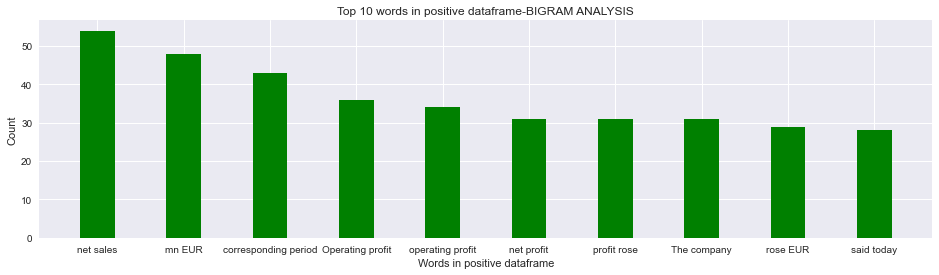

In [43]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [44]:
df_positive2.head(10)

,0,1
0,net sales,54
1,mn EUR,48
2,corresponding period,43
3,Operating profit,36
4,operating profit,34
5,net profit,31
6,profit rose,31
7,The company,31
8,rose EUR,29
9,said today,28


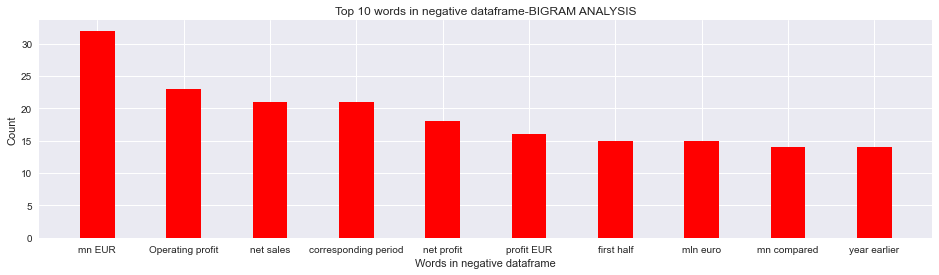

In [45]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [46]:
df_negative2.head(10)

,0,1
0,mn EUR,32
1,Operating profit,23
2,net sales,21
3,corresponding period,21
4,net profit,18
5,profit EUR,16
6,first half,15
7,mln euro,15
8,mn compared,14
9,year earlier,14


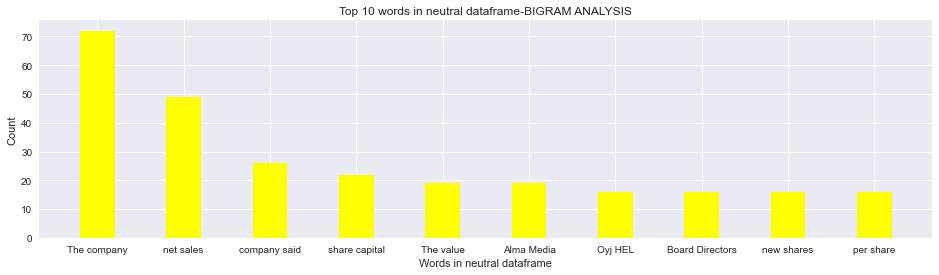

In [47]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [48]:
df_neutral2.head(10)

,0,1
0,The company,72
1,net sales,49
2,company said,26
3,share capital,22
4,The value,19
5,Alma Media,19
6,Oyj HEL,16
7,Board Directors,16
8,new shares,16
9,per share,16


**Creating trigrams**

In [49]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes


In [50]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,3):
        positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,3):
        negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,3):
        neutralValues3[word]+=1

Sentence after removing stopwords: ['Cargotec', 'Corporation', '', 'Press', 'Release', '', 'April', '28', '', '2008', '200', 'pm', 'Finnish', 'time', 'Cargotec', 'MacGREGOR', 'business', 'area', 'providing', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'received', 'significant', 'hatch', 'cover', 'orders', 'bulk', 'carriers', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Feb', '25', '', '2009', '', 'Finnish', 'printed', 'circuit', 'board', 'PCB', 'maker', 'Aspocomp', 'Group', 'Oyj', 'HEL', '', 'ACG1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '300000', 'USD', '385000', '2008', 'versus', 'net', 'loss', 'EUR', '653', 'million']
Sentence after removing stopwords: ['Finnish', 'security', 'privacy', 'software', 'solutions', 'developer', 'Stonesoft', 'Oyj', 'said', 'January', '7', '', '2008', 'preliminary', 'sales', 'StoneGate', 'products', 'grew', '59', 'pct', 'yearonyear', '36', 'mln', 'euro', '', '', '53', 'mln', '', 'fourth', 'quarter

Sentence after removing stopwords: ['For', 'Telenor', '', 'three', 'half', 'year', 'contract', 'worth', 'estimated', '126', 'YIT', 'chosen', 'Telenor', 'Elisa', 'principal', 'suppliers', 'ICT', 'solutions', 'Norway', '', 'Sweden', '', 'Denmark', 'Finland', '']
Sentence after removing stopwords: ['Nokia', '', 'strong', 'track', 'record', 'lowerend', 'handset', 'market', '', 'said', 'July', 'touchscreen', 'offering', 'would', 'come', 'year', 'cheaper', 'rival', 'models', 'order', 'tap', 'highervolume', 'market', '']
Sentence after removing stopwords: ['In', 'JanuarySeptember', '2009', '', 'Group', 'net', 'interest', 'income', 'increased', 'EUR', '1124', 'mn', 'EUR', '743', 'mn', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['Following', 'acquisition', '', 'Relacom', 'strengthen', 'presence', 'Finland', '', 'serving', 'operators', 'office', 'market', 'mobile', 'fixed', 'networks', 'construction', '', 'installation', 'maintenance', 'services', '']
Sentence after remov

Sentence after removing stopwords: ['It', 'also', 'turned', 'earnings', 'per', 'share', '', 'EPS', '', 'EUR', '008', 'versus', 'loss', 'per', 'share', 'EUR', '004', '']
Sentence after removing stopwords: ['President', 'CEO', 'Mika', 'VehvilÆinen', 'says', 'positive', 'signs', 'first', 'foremost', 'emerging', 'outside', 'Finland', '']
Sentence after removing stopwords: ['Raute', 'said', 'order', 'worth', 'around', '15', 'mln', 'eur', 'supply', 'several', 'plywood', 'production', 'lines', 'mills', 'operated', 'Russian', 'wood', 'products', 'company', 'Sveza', 'Group', '']
Sentence after removing stopwords: ['Finnish', 'handling', 'systems', 'company', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'said', 'today', 'EUR', '13', 'million', '', 'USD', '166', '', 'contract', 'deliver', 'MacGregor', 'hatch', 'covers', 'ships', 'ordered', 'Norwegian', 'shipowner', 'Grieg', 'Shipping', '']
Sentence after removing stopwords: ['The', 'parties', 'also', 'agreed', 'options', 'allow', 'UH', 'extensi

Sentence after removing stopwords: ['The', 'company', 'market', 'share', 'continued', 'increase', '']
Sentence after removing stopwords: ['Finnish', 'messaging', 'solutions', 'developer', 'Tecnomen', 'Corporation', '', 'OMX', 'Helsinki', '', 'TEM1V', '', 'said', 'Thursday', '', '11', 'December', '', 'received', 'expansion', 'order', 'Convergent', 'Charging', 'solution', 'Latin', 'America', '']
Sentence after removing stopwords: ['Last', 'month', '', 'Outokumpu', 'sold', '80', 'percent', 'technology', 'unit', '', 'Outokumpu', 'Technology', 'Oyj', '', 'strategic', 'goal', 'becoming', 'world', 'largest', 'stainless', 'steel', 'maker', '']
Sentence after removing stopwords: ['For', 'current', 'year', '', 'Raute', 'expects', 'net', 'sales', 'increase', 'operating', 'result', '', 'positive', '']
Sentence after removing stopwords: ['Dubai', 'Nokia', 'announced', 'launch', '', 'Comes', 'Music', '', '', 'groundbreaking', 'service', 'introduces', 'new', 'way', 'people', 'enjoy', 'music', '']
Sen

Sentence after removing stopwords: ['Kone', 'net', 'sales', 'rose', '14', '', 'yearonyear', 'first', 'nine', 'months', '2008', '']
Sentence after removing stopwords: ['The', 'bank', 'forecasts', 'Finland', 'GDP', 'grow', '2', '', '2010', '2011', '']
Sentence after removing stopwords: ['Digia', 'said', 'consolidated', 'net', 'sales', 'JanuaryJune', '2010', 'EUR67', '8', '', '97', '', 'period', '2009', '', 'EUR61', '9', '', '']
Sentence after removing stopwords: ['GeoSentric', 'Oyj', 'GeoSolutions', 'Business', 'Unit', 'GyPSii', '', 'mobile', 'digital', 'lifestyle', 'application', 'geomobility', 'social', 'networking', 'platform', '', 'signed', 'agreement', 'Nanjing', 'MyNet', 'make', 'GyPSii', 'mobile', 'social', 'networking', 'platform', 'available', 'customers', 'China', 'Mobile', '']
Sentence after removing stopwords: ['I', 'use', 'natural', 'fibers', 'make', 'clothes', 'comfortable', '', 'allow', 'skin', 'breathe', 'ecofriendly', '']
Sentence after removing stopwords: ['An', 'indivi

Sentence after removing stopwords: ['It', 'estimates', 'operating', 'profit', 'improve', 'third', 'quarter', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'sixmonth', 'period', 'increased', '', 'respectively', 'EUR7', '5', 'EUR655', '5', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['The', 'annual', 'Thesis', 'contest', 'aimed', 'enhance', 'thesis', 'quality', 'strengthen', 'thesis', 'culture', 'polytechnics', '']
Sentence after removing stopwords: ['With', 'launch', 'new', '3G', 'handsets', '', 'Nokia', 'aims', 'become', 'winner', 'China', '3G', 'market', '2G', 'market', '']
Sentence after removing stopwords: ['Metrics', 'QPR', 'ScoreCard', 'support', 'date', '', 'text', 'milestonebased', 'values', '', 'improve', 'support', 'managing', 'projects', 'around', 'performance', 'processrelated', 'content', '']
Sentence after removing stopwords: ['EuroChem', 'CFO', 'Andrey', 'Ilyin', 'said', '', '', 'This',

Sentence after removing stopwords: ['', 'We', 'love', 'Activision', 'fresh', '', 'colorful', 'approach', 'Rapala', '', 'We', 'Fish', '', '', 'said', 'Kelly', 'Brockpahler', '', 'Rapala', '']
Sentence after removing stopwords: ['Net', 'interest', 'income', 'increased', '45', '', 'EUR', '314', 'mn', 'EUR', '300', 'mn', '2004', '']
Sentence after removing stopwords: ['The', 'effect', 'savings', 'noticeable', 'beginning', '2010', '']
Sentence after removing stopwords: ['The', 'new', 'office', '', 'located', 'Shenzhen', '', 'strengthen', 'Vaisala', 'already', '10year', 'old', 'presence', 'China', '']
Sentence after removing stopwords: ['Nokian', 'Capacitors', '', 'equipment', 'used', 'raise', 'capacity', 'reliability', 'Indian', 'grid', '']
Sentence after removing stopwords: ['', 'After', 'long', '', 'unprofitable', 'period', 'Food', 'Division', 'posted', 'profitable', 'result', '', 'speaks', 'healthier', 'cost', 'structure', 'new', 'approach', 'business', 'operations', '', '', 'Rihko', 'sa

Sentence after removing stopwords: ['Its', 'board', 'directors', 'propose', 'dividend', 'EUR0', '12', 'per', 'share', '2010', '', 'EUR0', '08', 'per', 'share', 'paid', '2009', '']
Sentence after removing stopwords: ['Efficiency', 'programs', 'totalling', '100', 'million', 'euros', 'way', 'Finnair', '']
Sentence after removing stopwords: ['Vaisala', 'Oyj', 'Press', 'Release', 'September', '30', '', '2010', 'Vaisala', 'signed', 'contract', 'sell', 'oxygen', 'measurement', 'technology', 'business', 'SICK', 'Maihak', 'GmbH', '']
Sentence after removing stopwords: ['The', 'Finnish', 'group', 'anticipates', 'sales', 'gain', 'EUR42m', 'tax', 'expenses', '']
Sentence after removing stopwords: ['The', 'Group', 'cash', 'flow', 'operations', 'positive', '']
Sentence after removing stopwords: ['Markets', 'expecting', 'poor', 'performance', '', 'company', 'stock', '6', 'percent', '', 'x20ac', '2389', 'US', '3384', 'early', 'afternoon', 'trading', 'Helsinki', '']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['As', 'result', '', 'company', 'currently', 'anticipates', 'net', 'sales', 'increase', 'operating', 'result', 'positive', '']
Sentence after removing stopwords: ['Hearst', 'able', 'consolidate', '20', '', 'Russian', 'market', 'advertising', 'press', 'purchase', '']
Sentence after removing stopwords: ['In', 'addition', 'deal', 'includes', 'call', 'option', 'enable', 'Maritim', 'Food', 'AS', 'increase', 'holding', 'Sandanger', 'AS', '51', '', 'future', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'amounted', 'EUR0', '03', '', 'loss', 'EUR0', '08', '']
Sentence after removing stopwords: ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords: ['Altimo', 'TeliaSonera', 'said', 'yesterday', 'Usmanov', 'would', 'welcome', 'join', 'new', 'company', '']
Sentence after removi

Sentence after removing stopwords: ['The', 'Dutch', 'broker', 'noted', 'Nokian', 'Tyres', 'reported', 'good', 'first', 'quarter', '2006', '', 'line', 'consensus', '']
Sentence after removing stopwords: ['EuroChem', 'Head', 'Corporate', 'Finance', 'Alexander', 'Gavrilov', 'said', '', '', 'I', 'pleased', 'confirmed', 'EuroChem', 'able', 'attract', 'longterm', 'funds', 'attractive', 'rates', '']
Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
Sentence after removing stopwords: ['A', 'profit', 'still', 'target', '']
Sentence after removing stopwords: ['The', 'money', 'spent', '', 'strengthening', 'company', 'competitiveness', 'sphere', 'sawmill', 'products', 'increasing', 'volume', 'wood', 'delivered', 'processing', 'Russia', '', '', 'release', 'says', '']
Sentence after removing stopwords: ['Nokia', 'continue', 'invest', 

Sentence after removing stopwords: ['Finnish', 'software', 'developer', 'Done', 'Solutions', 'Oyj', 'said', 'net', 'profit', 'increased', '35', 'mln', 'euro', '', '', '46', 'mln', '', '2006', '23', 'mln', 'euro', '', '', '30', 'mln', '', '2005', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '122', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Ramirent', 'leading', 'company', 'machinery', 'equipment', 'rentals', 'construction', 'industry', '']
Sentence after removing stopwords: ['Outokumpu', 'chief', 'executive', 'Juha', 'Rantanen', 'expressed', 'confidence', 'China', 'market', '']
Sentence after removing stopwords: ['Diluted', 'loss', 'per', 'share', 'stood', 'EUR', '015', 'versus', 'EUR', '026', '']
Sentence after removing stopwords: ['', 'Installation', 'automatic', 'varnishing', 'line', 'important', 'part', 'company', 'strategy', 'region', 'central', 'eastern', 'Europe', '', '', 'said', 'Jozef', 

Sentence after removing stopwords: ['Profit', 'taxes', 'period', 'EUR0', '9', '', 'EUR0', '01', 'last', 'year', '']
Sentence after removing stopwords: ['Kesko', 'Agro', 'Lietuva', '', 'agricultural', 'machinery', 'grain', 'trader', 'another', 'member', 'Kesko', 'Group', '', 'boosted', 'sales', '429', 'percent', '134', 'million', 'euros', '', 'VAT', 'inclusive', '']
Sentence after removing stopwords: ['Based', 'upon', 'unique', 'fiber', 'expertise', 'innovative', 'approach', '', 'company', 'strong', 'market', 'position', 'several', 'business', 'areas', 'operates', '']
Sentence after removing stopwords: ['Vaisala', 'also', 'said', 'expects', 'net', 'sales', 'EUR', '2532', 'million', '2010', '', 'compared', 'EUR', '2522', 'million', 'recorded', '2009', '']
Sentence after removing stopwords: ['MD', 'Henning', 'Bahr', 'Stockmann', 'Gruppen', 'praises', 'trend', '', 'since', 'chains', 'become', 'stronger', 'decisionmaking', 'processes', 'clear', '']
Sentence after removing stopwords: ['Combi

Sentence after removing stopwords: ['The', 'price', 'logs', 'clearly', 'improved', '2009', 'also', 'price', 'pulpwood', 'gone', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '9', '', '2009', '', 'Finnish', 'computer', 'services', 'company', 'Proha', 'Oyj', '', 'HEL', '', 'ART1V', '', 'said', 'today', 'net', 'loss', 'narrowed', 'EUR', '113000', '', 'USD', '146000', '', '2008', 'EUR', '12', 'million', '2007', '']
Sentence after removing stopwords: ['In', 'January', '', 'traffic', '', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', '', 'went', '32', '', 'capacity', '', 'measured', 'available', 'seat', 'kilometres', 'ASK', '', 'rose', '122', '', '']
Sentence after removing stopwords: ['Finnish', 'technology', 'group', 'Aspocomp', 'Group', 'Oyj', '', 'OMX', 'Helsinki', '', 'ACG1V', '', 'issued', 'third', 'quarter', 'report', 'Thursday', '', '13', 'November', '', '', 'posting', 'operating', 'profit', 'EUR0', '4', '', 'compared', 'loss', 'EUR0', '5', 'thir

Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'Poland', 'profitability', 'program', 'launched', 'Oborniki', 'steel', 'frame', 'sandwich', 'panel', 'plant', '']
Sentence after removing stopwords: ['Comptel', '', 'vendor', 'dynamic', 'Operations', 'Support', 'System', '', 'OSS', '', 'software', '', 'selected', 'Orascom', 'Telecom', '', 'OTH', '', 'partner', 'provisioning', 'activation', 'solutions', 'mobile', 'services', '']
Sentence after removing stopwords: ['SysOpen', 'Digia', 'signed', 'agreement', 'main', 'shareholders', 'Sentera', 'holding', 'total', '7739', '', 'share', 'capital', 'votes', 'Sentera', '']
Sentence after removing stopwords: ['The', 'longstanding', 'partnership', 'commitment', 'enable', 'parties', 'develop', 'respective', 'operations', '', 'ESL', 'Shipping', 'also', 'opportunity', 'update', 'fleet', 'improve', 'efficiency', '']
Sentence after removing stopwords: ['The', 'executive', 'group', 'participate', 'adjustments', 'fixedterm', '5', '', 

Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fourth', 'quarter', 'went', 'EUR3m', 'EUR4', '2', 'corresponding', 'period', '2009', 'included', 'costs', 'growth', 'projects', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'sales', 'three', 'months', 'end', 'March', 'slid', 'EUR86', '4', 'US', '1134', 'EUR91', '2', 'last', 'year', '']
Sentence after removing stopwords: ['Publishing', 'Sweden', 'operating', 'loss', 'EUR', '11', 'mn', 'Q1', '2009', '', 'compared', 'profit', 'EUR', '06', 'mn', 'year', 'ago', '']
Sentence after removing stopwords: ['However', '', 'company', 'saw', 'net', 'profit', 'third', 'quarter', 'EUR1', '4', 'EUR1', '5', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['', 'We', 'cut', 'frequency', 'New', 'York', 'last', 'year', '', 'explains', 'fall', '', '', 'said', '']
Se

Sentence after removing stopwords: ['In', 'February', 'Elcoteq', 'group', 'sold', 'St', 'Petersburg', 'facility', '', 'according', 'unconfirmed', 'information', 'reason', 'could', 'supply', 'problems', 'Russian', 'customs', 'service', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'target', 'cut', 'EUR', '485', 'EUR', '555', 'Holmen', 'target', '', 'SEK', '135', 'SEK', '150', '']
Sentence after removing stopwords: ['Jan', '6', '', 'Ford', 'struggling', 'face', 'slowing', 'truck', 'SUV', 'sales', 'surfeit', 'uptodate', '', 'gottahave', 'cars', '']
Sentence after removing stopwords: ['Operating', 'loss', 'Pulp', '', 'Paper', 'Machinery', 'unit', 'EUR', '3mn', 'September', '2007', '', 'August', '2008', '', 'compared', 'profit', 'EUR', '37', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['30', 'November', '2009', '', 'Finnish', 'office', 'furniture', 'maker', 'Martela', 'Oyj', 'HEL', '', 'MARAS', 'said', 'today', 'make', 'redundant', 'three', 'people', 'nine', '

Sentence after removing stopwords: ['', 'The', 'Group', 'sales', 'period', 'EUR', '375', 'million', '', 'EUR', '482', 'million', '', '192008', '', 'result', 'taxes', 'loss', 'EUR', '35', '', '12', '', 'million', '']
Sentence after removing stopwords: ['Profit', 'period', 'totalled', 'EUR', '08', 'mn', '', 'EUR', '11', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Most', 'permanent', 'layoffs', 'plywood', 'sawn', 'timber', 'sectors', 'Finnish', 'company', 'operations', 'several', 'domestic', 'mills', '', 'earlier', 'year', 'temporarily', 'laid', '1200', 'workers', 'save', 'costs', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '67', 'mn', '', 'EUR', '72', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['As', 'result', '', '12', 'people', 'made', 'redundant', 'total', '67', 'persons', 'laid', 'temporarily', '']
Sentence after removing stopwords: ['Prices', 'delivery', 'volumes', 'broadb

Sentence after removing stopwords: ['The', 'company', 'confirmed', 'estimate', 'lower', 'revenue', 'whole', '2009', 'yearago', 'EUR93', '9', 'given', 'interim', 'report', '5', 'August', '2009', '']
Sentence after removing stopwords: ['A', 'total', '165', 'mn', 'passenger', 'ship', 'journeys', 'took', 'place', 'northern', 'Baltic', 'Sea', '2007', '', 'slightly', '165', 'mn', '2006', '']
Sentence after removing stopwords: ['ADPnews', '', 'Aug', '3', '', '2009', '', 'Finnish', 'media', 'group', 'IlkkaYhtyma', 'Oyj', 'HEL', '', 'ILK2S', 'said', 'today', 'net', 'profit', 'fell', '45', '', 'year', 'EUR', '59', 'million', 'USD', '84', 'first', 'half', '2009', '']
Sentence after removing stopwords: ['On', 'hand', '', 'Finnish', 'sawmills', '', 'production', 'decreased', 'even', '']
Sentence after removing stopwords: ['20', 'October', '2010', '', 'Finnish', 'environmental', 'management', 'company', 'Lassila', '', 'Tikanoja', 'Oyj', 'HEL', '', 'LAT1V', '', 'LT', '', 'said', 'Monday', 'expects', 

Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', 'said', 'secondquarter', 'result', 'would', 'fall', 'half', 'compared', 'period', '2007', '']
Sentence after removing stopwords: ['Operating', 'profit', '2009', 'lower', 'outlook', 'published', 'earlier', '']
Sentence after removing stopwords: ['The', 'poorest', 'index', 'figure', 'given', 'Finnish', 'power', 'company', 'Fortum', '', '45', '']
Sentence after removing stopwords: ['ADPnews', '', 'Feb', '5', '', '2010', '', 'Finnish', 'real', 'estate', 'investor', 'Sponda', 'Oyj', 'HEL', '', 'SDA1V', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '815', 'million', 'USD', '118', '2009', 'profit', 'EUR', '293', 'million', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '96', 'mn', '', 'EUR', '420', 'mn', 'year', '']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'amounted', 'EUR', '406', 'mn', '', 'EUR', '573', 'mn', 'yearonyear', '']
Sen

Sentence after removing stopwords: ['The', 'SeaWind', 'en', 'route', 'Finnish', 'port', 'Turku', 'Stockholm', 'got', 'stuck', 'ice', 'already', 'around', '4', 'pm', 'Wednesday', 'Regal', 'Star', 'journey', 'Swedish', 'port', 'Kapellskar', 'Paldiski', 'northwestern', 'Estonia', 'cut', 'short', '2', 'Thursday', '']
Sentence after removing stopwords: ['Loss', 'period', 'totalled', 'EUR', '156', 'mn', 'compared', 'profit', 'EUR', '63', 'mn', '2008', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'Bank', 'land', 'reports', 'operating', 'profit', 'fell', 'EUR', '61', 'mn', 'second', 'quarter', '2008', 'EUR', '75', 'mn', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['Operating', 'loss', 'amounted', 'EUR', '09', 'mn', 'first', 'half', '2006', 'compared', 'profit', 'EUR', '05', 'mn', 'first', 'half', '2005', '']
Sentence after removing stopwords: ['11', 'August', '2010', '', 'Finnish', 'measuring', 'equipment', 'maker', 'Vaisala', 'Oyj', 'HEL', '', 'VAIAS', 

Sentence after removing stopwords: ['cents', 'Recognize', 'potential', 'partnerships', 'suppliers', '']
Sentence after removing stopwords: ['Compagnie', 'de', 'Financement', 'Foncier', '', 'Is', 'issue', 'benchmark', '', '10', 'year', 'covered', 'deal', 'Euros', '']
Sentence after removing stopwords: ['The', 'unit', 'planned', 'operational', 'second', 'half', '2007', 'full', 'stream', '2008', '']
Sentence after removing stopwords: ['shock', 'phase', '', '', 'consumers', 'started', 'plan', 'implement', 'building', 'projects', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'record', 'capital', 'gain', 'EUR', '33', 'million', 'nonrecurring', 'financial', 'item', 'fourth', 'quarter', '2006', 'results', '']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', '', 'Heikki', 'Malinen', '', 'President', 'CEO', '', 'Poyry', 'PLC', 'tel', '358', '10', '33', '21307', 'Poyry', 'global', 'expert', 'consulting', 'engineering', '']
Sentence after removing stopwor

Sentence after removing stopwords: ['The', 'outsourcing', 'agreement', '', 'covers', 'equipment', 'depots', 'Turku', 'Tampere', '', 'run', 'five', 'years', '', 'Cramo', 'said', 'Thursday', '']
Sentence after removing stopwords: ['Founded', '1985', '', 'Quatrocon', 'clientele', 'consists', 'public', 'sector', 'builders', '', 'central', 'trading', 'companies', 'major', 'construction', 'firms', '']
Sentence after removing stopwords: ['The', 'Lemminkainen', 'Group', '', 'headquartered', 'Helsinki', '', 'Finland', '', 'operates', 'sectors', 'construction', 'industry', '', 'civil', 'engineering', '', 'building', 'contracting', '', 'technical', 'building', 'services', 'building', 'materials', 'industry', '']
Sentence after removing stopwords: ['The', 'agreement', 'includes', 'application', 'maintenance', 'support', 'services', '']
Sentence after removing stopwords: ['', 'Russia', 'ready', 'participate', 'open', 'tender', 'Lattelecom', 'privatization', '']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['There', 'seem', 'enough', 'hours', 'day', 'Pekkarinen', '']
Sentence after removing stopwords: ['Honkarakenne', 'mainly', 'exports', 'large', 'luxury', 'log', 'houses', 'Russia', 'used', 'onefamily', 'houses', 'holiday', 'homes', '', '70', '', 'sales', 'go', 'Moscow', 'region', '', '20', '', 'St', 'Petersburg', 'region', '', 'remainder', 'locations', '']
Sentence after removing stopwords: ['According', 'Finnish', 'financial', 'services', 'group', 'Sampo', 'CEO', '', 'Bj¦rn', 'Wahlroos', '', 'Danish', 'Danske', 'Bank', 'acquisition', 'Sampo', 'Bank', 'EUR', '4bn', 'largest', 'cash', 'deal', 'Finland', 'economic', 'history', '']
Sentence after removing stopwords: ['The', 'company', 'build', 'altogether', '130', 'new', 'substations', 'end', 'year', '']
Sentence after removing stopwords: ['The', 'start', 'negotiations', '', 'relating', 'Glaston', 'efficiency', 'program', '', 'announced', 'October', '']
Sentence after removing stopwords: ['The', 'popular

Sentence after removing stopwords: ['Russian', 'Media', 'Ventures', '', 'minority', 'shareholder', 'Peter', 'Hervy', 'denied', 'plans', 'sell', 'OVA', 'Press', '', 'daily', 'said', '']
Sentence after removing stopwords: ['Our', 'customers', 'include', 'companies', 'energy', 'process', 'industry', 'sectors', '', 'particular', '']
Sentence after removing stopwords: ['Creating', 'interfaces', 'similar', 'interactions', 'real', 'world', 'enable', 'experiences', 'natural', 'intuitive', '', 'way', 'modern', 'games', 'movies', 'immersive', 'use', 'realistic', '3D', 'graphics', '']
Sentence after removing stopwords: ['ABN', '', '59', '087', '901', '620', 'represent', '510', '', 'voting', 'rights', 'share', 'capital', 'Citycon', 'Oyj', '']
Sentence after removing stopwords: ['Welcome', '']
Sentence after removing stopwords: ['The', 'new', 'company', 'likely', 'hold', 'IPO', 'NYSE', 'another', 'international', 'stock', 'exchange', '', 'according', 'Altimo', 'manages', 'Alfa', 'Group', 'telecommu

Sentence after removing stopwords: ['', 'The', 'summer', 'collection', '2008', 'joyfully', 'fresh', 'like', 'vitamin', 'injection', '', '', 'said', 'HM', 'head', 'design', 'Margareta', 'van', 'den', 'Bosch', '']
Sentence after removing stopwords: ['Master', 'Mayawas', 'jointly', 'developed', 'Nokia', 'Siemens', 'Networks', 'UFA', '', 'FremantleMedia', '', 'actively', 'advertised', 'Maxis', 'end', 'May', '2007', '']
Sentence after removing stopwords: ['According', 'HK', 'Ruokatalo', '', 'almost', 'meat', 'used', 'company', 'comes', 'Finland', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'agreement', 'USD4', '0', '', 'company', 'said', '']
Sentence after removing stopwords: ['The', 'compnay', 'also', 'said', 'would', 'lower', 'price', 'development', 'projects', 'one', 'third', 'compared', 'last', 'November', '']
Sentence after removing stopwords: ['Under', 'transaction', 'agreement', '', 'Metsaliitto', 'purchase', '247', '', 'MetsaBotnia', 'shares', 'UPM', '3', '', 'M

Sentence after removing stopwords: ['Stora', 'Enso', 'business', 'North', 'America', 'annual', 'capacity', '3', 'million', 'tons', 'employs', '4350', 'people', '']
Sentence after removing stopwords: ['Kemira', 'supply', 'additional', 'volumes', 'iron', 'coagulants', 'company', 'plant', 'Helsingborg', '', 'Sweden', '']
Sentence after removing stopwords: ['The', 'commission', 'said', 'hydrogen', 'peroxide', 'PBS', 'market', 'worth', '470', 'million', 'euros', '2000', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '158', 'companies', 'including', 'many', 'key', 'niche', 'players', 'including', 'major', 'Nonwovens', 'manufacturers', 'Ahlstrom', 'Corporation', '', 'Asahi', 'Kasei', 'Corporation', '', 'Buckeye', 'Technologies', '', 'Inc', '', 'EI', '']
Sentence after removing stopwords: ['Fortum', 'considering', 'taking', 'part', 'nuclear', 'energy', 'projects', 'outside', 'Finland', '']
Sentence after removing stopwords: ['The', 'chain', 'unite', '4550', 'centres', 'en

Sentence after removing stopwords: ['Presentation', 'materials', 'posted', 'company', 'website', '', 'wwwseahawkdrillingcom', '', 'Investor', 'Relations', '', 'section', '', '', 'Webcast', '', 'Presentations', '', 'tab', '']
Sentence after removing stopwords: ['No', 'financial', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopwords: ['The', 'company', 'disclose', 'details', '', 'including', 'anticipated', 'transaction', 'timetable', 'name', 'new', 'investor', '', 'within', 'one', 'week', '']
Sentence after removing stopwords: ['Aker', 'Yards', 'Finland', 'begin', 'using', 'Chinese', 'subcontractors', 'Finnish', 'shipyards', '']
Sentence after removing stopwords: ['The', 'contracts', 'Raute', 'Corporation', 'Muling', 'Kemian', 'Wood', 'Products', 'Co', '', 'Ltd', '', 'announced', '3', 'November', '2010', '', 'taken', 'effect', '']
Sentence after removing stopwords: ['Community', 'gardening', 'become', 'popular', 'activity', '', 'especially', 'raise', 'vegetables', '']

Sentence after removing stopwords: ['The', 'adjustment', 'measures', 'carried', 'phases', 'secure', 'delivery', 'capability', '']
Sentence after removing stopwords: ['Comptel', 'Corporation', 'Sami', 'Ervio', 'President', 'CEO', '', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comptel', 'Dynamic', 'OSS', 'solutions', 'enable', 'telecom', 'service', 'providers', 'deliver', 'services', 'flexibly', 'charge', 'effectively', '']
Sentence after removing stopwords: ['Shuweihat', '2', 'got', 'way', 'July', '2008', 'project', 'awarded', 'desalination', 'power', 'contractors', '']
Sentence after removing stopwords: ['On', 'preliminary', 'estimate', '', 'hotel', 'operate', 'brand', 'Novotel', '']
Sentence after removing stopwords: ['Initial', 'estimated', 'total', 'value', 'contract', '250', '000', 'Euros', '', 'excluding', 'VAT', '']
Sentence after removing stopwords: ['Exel', 'wants', 'serve', 'industrial', 'customers', 'individual', 'products', '']
Sentence after removin

Sentence after removing stopwords: ['Thanks', 'development', 'system', 'enables', 'trace', 'origin', 'palm', 'oil', 'uses', '', 'knows', 'exactly', 'palm', 'oil', 'produced', '']
Sentence after removing stopwords: ['', 'Tweeple', 'check', 'following', '', 'cautious', 'clicking', 'URLs', 'tinyurls', '', '']
Sentence after removing stopwords: ['As', 'result', 'share', 'issue', '', 'number', 'company', 'shares', 'increases', '391630', 'shares', 'share', 'capital', 'total', 'EUR', '1566520', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'deal', 'USD', '29mn', '']
Sentence after removing stopwords: ['Technopolis', 'approximately', '130', 'customer', 'companies', 'Jyvaskyla', '']
Sentence after removing stopwords: ['It', 'even', 'little', 'bit', 'higher', 'Yara', 'multiples', '', '', 'analyst', 'Helsinki', 'said', '']
Sentence after removing stopwords: ['There', 'return', 'flights', 'Stuttgart', 'every', 'morning', '', 'well', 'evening', 'departures', 'Thursdays', '', 'Fri

Sentence after removing stopwords: ['Iso', 'Omena', 'based', 'Matinkyla', 'district', 'southern', 'part', 'city', 'Espoo', '', 'southern', 'Finland', '']
Sentence after removing stopwords: ['Solteq', 'Plc', 'ANNOUNCEMENT', '16122010', 'SHARE', 'REPURCHASE', '16122010', 'In', 'Helsinki', 'Stock', 'Exchange', 'Solteq', 'Plc', 'holds', 'total', '486969', 'shares', 'including', 'shares', 'repurchased', '16122010', '']
Sentence after removing stopwords: ['Analysts', 'surveyed', 'Thomson', 'Financial', 'expected', 'revenue', '', '69', 'million', 'quarter', '']
Sentence after removing stopwords: ['So', 'far', 'company', 'awarded', '', '350000', 'worth', 'tools', 'materials', '']
Sentence after removing stopwords: ['The', 'company', 'US', 'subsidiary', 'Vaisala', 'Inc', 'acquires', 'Aviation', 'Systems', 'Maintenance', '', 'Inc', 'ASMI', '', 'Kansas', '', 'US', 'based', 'airport', 'service', 'company', '26', 'million', 'USD', 'net', 'sales', '2008', '']
Sentence after removing stopwords: ['The

Sentence after removing stopwords: ['The', 'company', 'operates', 'worldwide', 'employs', 'total', 'approximately', '47000', 'persons', '']
Sentence after removing stopwords: ['The', 'forecast', '2012', '33', '', '']
Sentence after removing stopwords: ['The', 'composite', 'body', 'coated', 'hard', 'coating', 'layer', 'produced', 'thermal', 'spraying', '', 'coating', 'ground', '', '']
Sentence after removing stopwords: ['Okmetic', 'Board', 'Directors', 'also', 'decided', 'new', 'share', 'ownership', 'program', 'directed', 'company', 'top', 'management', '']
Sentence after removing stopwords: ['Finnish', 'heatretaining', 'fireplaces', 'maker', 'Tulikivi', 'Oyj', 'said', 'August', '29', '', '2007', 'local', 'tiled', 'stoves', 'utility', 'ceramics', 'subsidiary', 'Kermansavi', 'Oy', 'merge', 'Tulikivi', 'means', 'absorption', 'order', 'streamline', 'latest', 'corporate', 'structure', '']
Sentence after removing stopwords: ['For', '2009', '', 'Incap', 'expects', 'revenue', 'EUR', '70', 'mil

Sentence after removing stopwords: ['CS', 'Cabot', 'exports', '55', '', 'production', 'mainly', 'Goodyear', '', 'Bridgestone', 'Michelin', 'plants', 'Poland', '', 'well', 'Germany', 'Michelin', 'Italy', 'Pirelli', 'company', 'logistics', 'center', 'Paris', '', 'Stefan', 'said', '']
Sentence after removing stopwords: ['', 'Nordic', 'infrastructure', 'construction', 'one', 'strategic', 'growth', 'areas', '']
Sentence after removing stopwords: ['On', 'Dec', '1', '', 'Grimaldi', 'acquired', '15', 'million', 'shares', '501percent', 'stake', 'Finnlines', '']
Sentence after removing stopwords: ['', '', 'Munich', '', '14', 'January', '2008', '', 'BAVARIA', 'Industriekapital', 'AG', 'closed', 'acquisition', 'Elcoteq', 'Communications', 'Technology', 'GmbH', 'Offenburg', '', 'Germany', '', 'approval']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'delivered', 'VR

Sentence after removing stopwords: ['The', 'proposal', 'shareholders', 'elect', 'Mr', 'Hannu', 'Krogerus', 'Board', 'based', 'long', 'unrivalled', 'experience', 'knowledge', 'matters', 'related', 'Elcoteq', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Poland', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Poland', '']
Sentence after removing stopwords: ['The', 'dollar', 'bounced', 'back', 'hitting', 'another', 'record', 'low', 'euro', '', 'reached', '', '141', 'first', 'time', '']
Sentence after removing stopwords: ['The', 'oil', 'shale', 'feedersupply', 'solution', 'deliver', 'crushed', 'oil', 'shale', 'shale', 'oil', 'refinery', 'already', 'operation', 'well', 'novel', 'Enefit280', 'shale', 'oil', 'technology', 'processing', 'plant', '']
Sentence after removing stopwords: ['The', 'bond', 'value', 'EUR150m', 'maturity', '4', 'years', '']
Sentence after removing stopwor

Sentence after removing stopwords: ['The', 'contract', 'includes', 'heating', 'plant', 'equipment', 'associated', 'installation', 'work', '']
Sentence after removing stopwords: ['Scanfil', 'plc', 'global', 'contract', 'manufacturer', 'systems', 'supplier', 'communication', 'industrial', 'electronics', '']
Sentence after removing stopwords: ['Gearing', '43', '', 'compared', '67', '', '2004', '']
Sentence after removing stopwords: ['The', 'building', 'house', 'product', 'development', 'test', 'laboratories', '']
Sentence after removing stopwords: ['Trading', 'code', '', 'ELI1V', 'Number', 'shares', '', '99483', 'Priceshare', '', 'Gratuitous', 'After', 'transfer', '', 'Elisa', 'holds', 'total', '10435023', 'shares', '']
Sentence after removing stopwords: ['Editor', 'note', '', 'Grimaldi', 'generated', '17', 'bln', 'euro', '', '', '2182', 'bln', '', 'turnover', '2005', '', 'ANSA', 'reported', 'May', '29', '', '2006', '']
Sentence after removing stopwords: ['The', 'credit', 'covers', 'appro

Sentence after removing stopwords: ['The', 'Finnish', 'company', 'sold', 'UK', 'operation', '', 'consisting', '50', 'staff', 'offices', 'London', '', 'Birmingham', 'Manchester', '', 'part', 'deal', 'Hampden', 'July', '2001', 'Europeanwide', 'property', 'casualty', 'arm', 'Sampo', 'Industrial', '']
Sentence after removing stopwords: ['The', 'deal', 'process', 'cranes', 'Russian', 'steel', 'mill', 'PNTZ', 'Pervorouralsky', 'order', 'placed', 'Turkish', 'construction', 'company', 'Gama', 'Endustri', 'Tesisleri', 'Imalat', 'Montaj', 'AS', '']
Sentence after removing stopwords: ['Since', 'registration', 'shares', 'subscribed', 'directed', 'share', 'issue', '', 'new', 'number', 'Panostaja', 'shares', 'voting', 'rights', '41733110', '']
Sentence after removing stopwords: ['', 'The', 'industry', 'coming', 'interesting', 'fork', 'road', 'handset', 'manufacturers', 'wireless', 'carriers', 'attempt', 'serve', 'portal', 'Webbased', 'service', 'wireless', 'handset', '', '', 'wrote', '']
Sentence af

Sentence after removing stopwords: ['In', 'parallel', '', 'TeliaSonera', 'decided', 'conduct', 'compulsory', 'acquisition', '']
Sentence after removing stopwords: ['Scanfil', 'expects', 'net', 'sales', '2008', 'remain', '2007', 'level', '']
Sentence after removing stopwords: ['The', 'Efore', 'plant', 'Saarijarvi', 'central', 'Finland', 'one', 'largest', 'employers', 'region', '']
Sentence after removing stopwords: ['STOCKMANN', 'plc', 'COMPANY', 'ANNOUNCEMENT', 'February', '20', '', '2007', '', '1340', 'An', 'annual', 'summary', 'Stockmann', 'stock', 'exchange', 'financial', 'press', 'releases', '2006', 'available', 'company', 'website', 'address', 'wwwstockmanncom', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'currently', 'French', 'distribution', 'unit', 'Ragot', 'located', 'Loudeac', '', 'Normandy', '', 'distribution', 'unit', 'Waterqueen', 'line', 'supplier', 'Tortue', 'Saint', 'Marcel', 'midFrance', 'hook', 'manufacturing', 'unit', 'VMC', 'hook', 'distributio

Sentence after removing stopwords: ['Estonia', 'Agriculture', 'Minister', 'HelirValdor', 'Seeder', 'Finland', 'twoday', 'visit', '', 'course', 'meet', 'Finnish', 'counterpart', 'SirkkaLiisa', 'Anttila', '']
Sentence after removing stopwords: ['The', 'major', 'part', 'deliveries', 'include', 'different', 'AC', 'CXE', 'amplifier', 'solutions', 'products', 'Belgian', 'DINH', 'Telecom', '', 'broadband', 'solutions', 'company', 'acquired', 'Teleste', 'spring', '2007', '']
Sentence after removing stopwords: ['Price', 'talk', 'midmarket', 'swaps', 'plus', '105', 'bps', 'area', 'leads', 'Barclays', '', 'BNPP', '', 'UBS', 'CBA', '']
Sentence after removing stopwords: ['Niklas', 'Skogster', 'employed', 'ABB', 'Group', 'various', 'positions', 'concerning', 'development', 'operations', '']
Sentence after removing stopwords: ['Mr', 'Doring', 'Eaton', 'since', '1989', 'acted', 'Business', 'Unit', 'Manager', 'Eaton', 'Power', 'Controls', 'Business', 'Unit', 'since', 'January', '2007', '']
Sentence af

Sentence after removing stopwords: ['Sullivan', 'said', 'boards', '', 'really', 'involve', 'lot', 'work', '', 'people', 'get', 'paid', 'time', '', '']
Sentence after removing stopwords: ['Altona', 'stated', 'private', 'company', 'Altona', 'chairman', 'Kevin', 'Maloney', '', 'Tulla', 'Resources', '', 'would', 'take', 'entitlement', 'full', '']
Sentence after removing stopwords: ['LKAB', '', 'headquartered', 'Lulea', '', 'Sweden', '', 'hightech', 'mining', 'company', 'producing', 'upgraded', 'iron', 'ore', 'products', 'steel', 'industry', '']
Sentence after removing stopwords: ['One', 'largest', 'projects', 'magazine', 'division', 'SanomaWSOY', '', 'Sanoma', 'Magazines', 'International', '2006', 'became', 'launch', 'Russian', 'magazine', 'Gloriya', '']
Sentence after removing stopwords: ['The', 'decision', 'Tekes', 'based', '', 'among', '', 'following', 'grounds', '', 'project', 'significant', 'impact', 'business', 'development', 'company', '']
Sentence after removing stopwords: ['The', 

Sentence after removing stopwords: ['The', 'order', 'comprises', 'four', 'ball', 'mills', '', 'organized', 'two', 'different', 'streams', 'treating', 'ore', 'Pilanesberg', 'platinum', 'mine', '']
Sentence after removing stopwords: ['Of', 'Bavelloni', 'NST', 'joint', 'ventures', '', 'Bavelloni', 'Tools', '', 'completes', 'semiproducts', 'produced', 'Italy', 'highquality', 'tools', 'sold', 'DiaPol', 'brand', '']
Sentence after removing stopwords: ['Implementation', 'project', 'carried', 'Finnish', 'company', 'YIT', 'association', 'investment', 'fund', 'Evli', 'Property', 'Investment', 'Russia', '', 'EPI', '', '']
Sentence after removing stopwords: ['The', 'Board', 'established', 'Remuneration', 'Committee', 'following', 'members', '', '', 'Sari', 'Baldauf', 'Chairman', '', 'Tapio', 'Hintikka', '', 'Heikki', 'Westerlund', 'In', 'addition', '', 'Board', 'decided', 'appoint', 'Nomination', 'Committee', 'later', 'stage', '']
Sentence after removing stopwords: ['Sarantel', '', 'based', 'Welli

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['The', 'address', 'location', 'provided', 'local', 'controller', '', 'preferably', 'wireless', 'transmission', '', 'uses', 'address', 'location', 'access', 'appliance', 'control', 'module', '']
Sentence after removing stopwords: ['Metso', 'Oyj', 'said', 'sold', 'spreader', 'roll', 'manufacturing', 'business', 'related', 'assets', 'town', 'Nokia', '', 'southern', 'Finland', '', 'group', 'Finnish', 'investors', '', 'operate', 'business', 'name', 'Finbow', 'Oy', '']
Sentence after removing stopwords: ['cents', 'The', 'profile', 'contains', 'business', 'operations', '', 'company', 'history', '', 'major', 'products', 'services', '', 'prospects', '', 'key', 'competitors', '', 'structure', 'key', 'employees', '', 'locations', 'subsidiaries', '']
Sentence after removi

Sentence after removing stopwords: ['The', 'intent', 'article', 'focus', 'attention', 'fact', 'development', 'model', 'China', 'followed', 'different', 'model', 'India', 'followed', '']
Sentence after removing stopwords: ['The', 'Group', 'revenue', 'amounts', 'EUR', '80', 'million', '', 'half', 'accounted', 'exports', '']
Sentence after removing stopwords: ['The', 'report', 'examines', 'medical', 'equipment', 'business', 'structure', 'operations', '', 'history', 'products', '', 'provides', 'analysis', 'key', 'medical', 'equipment', 'revenue', 'lines', '']
Sentence after removing stopwords: ['Tiimari', 'registered', 'share', 'capital', '16474755', 'shares', 'per', 'today', '']
Sentence after removing stopwords: ['In', 'return', 'New', 'Yorkbased', 'private', 'equity', 'firm', 'receive', '51', '', 'stake', 'Latvian', 'IT', 'telecom', 'group', '']
Sentence after removing stopwords: ['The', 'Company', 'said', 'previously', 'EB', 'delivered', 'custom', 'solution', 'LG', 'Electronics', 'maki

Sentence after removing stopwords: ['The', 'Costanza', 'light', '', 'aluminum', 'base', 'washable', 'shade', '', 'comes', 'white', '', 'pistachio', '', 'orange', '', 'blue', 'red', '']
Sentence after removing stopwords: ['The', 'business', 'units', 'InvestLesProm', 'Group', 'cover', 'full', 'forest', 'industry', 'chain', '', 'Group', 'owns', 'forests', '', 'sawmills', '', 'paper', 'pulp', 'mills', '', 'processing', 'plants', '']
Sentence after removing stopwords: ['The', 'size', 'cider', 'bottle', 'remain', 'unchanged', '']
Sentence after removing stopwords: ['The', 'value', 'confirmed', 'aircraft', 'orders', 'totals', 'EUR', '2bn', '']
Sentence after removing stopwords: ['The', 'Inventors', 'Ridge', 'Justin', '', 'Bao', 'Yiliang', 'Karczewicz', 'Marta', '']
Sentence after removing stopwords: ['According', 'Honka', 'Japan', 'Managing', 'Director', 'Marko', 'Saarelainen', '', 'Honkarakenne', 'exports', '200', 'ready', 'made', 'log', 'houses', 'Japan', 'year', '']
Sentence after removing

Sentence after removing stopwords: ['Simultaneously', 'merger', 'plan', 'another', 'merger', 'plan', 'signed', '', 'according', 'Suomen', 'Projektivuokraus', 'Oy', '', 'subsidiary', 'VTMRakennuskonevuokraamo', 'Oy', '', 'would', 'merged', 'VTMRakennuskonevuokraamo', 'Oy', '']
Sentence after removing stopwords: ['That', 'address', 'also', 'happens', 'house', 'Italian', 'megamart', 'Eataly', '', 'meaning', '', 'Come', '', 'kids', '', 'going', 'Toy', 'Building', '', '']
Sentence after removing stopwords: ['OTHER', '', 'NorthRhine', 'Westphalia', '', 'Is', 'issue', 'benchmark', '', '5', 'year', 'fixed', 'rate', 'deal', 'Euros', '']
Sentence after removing stopwords: ['The', 'subsidiary', 'setting', 'facility', 'manufacturing', 'highdensity', 'interconnection', 'printed', 'circuit', 'boards', 'PCBs', 'Nokia', 'special', 'economic', 'zone', 'Sriperumbudur', 'near', 'Chennai', '']
Sentence after removing stopwords: ['FSecure', 'Online', 'Backup', 'automatically', 'protects', 'content', 'store

Sentence after removing stopwords: ['Kemira', 'shares', 'closed', '', '', 'x20ac', '', '1666', '', '', '22US', '71', '', '']
Sentence after removing stopwords: ['We', 'made', 'longterm', 'investments', 'developing', 'system', 'implementation', 'model', '']
Sentence after removing stopwords: ['In', 'addition', '', 'Kazakh', 'delegation', 'visit', 'Finland', 'SITRA', 'investment', 'fund', '', 'Honkarakenne', 'Ltd', 'Nokia', 'headquarters', 'study', 'TeliaSonera', 'Ltd', 'JSC', 'activities', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed', 'option', 'rights', 'company', 'stock', 'option', 'programs', 'I', '2001', 'II', '2001', '']
Sentence after removing stopwords: ['One', 'headboxes', 'equipped', 'modern', 'consistency', 'control', 'system', 'ensure', 'cross', 'machine', 'profile', 'plasterboard', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['The', 'endtoend', 'delivery', 'combines', 'competencies', 'services', 'TietoEnators', 'Telecom', '', 'Media', '', 'Processing', '', 'Network', 'Digital', 'Innovations', 'Business', 'Areas', '']
Sentence after removing stopwords: ['The', 'company', 'operates', 'business', 'two', 'reportable', 'segments', '', 'including', 'Banking', 'Investment', 'Services', '', 'NonLife', 'Insurance', '']
Sentence after removing stopwords: ['Further', 'concrete', 'cooperation', 'also', 'carried', 'various', 'projects', '', 'doctoral', 'theses', 'diploma', 'dissertations', '']
Sentence after removing stopwords: ['Subscribers', 'China', 'Unicom', '', 'nation', 'second', 'largest', 'mobile', 'phone', 'operator', 'China', 'Mobile', '', 'expected', 'release', 'pictures', '', 'videos', 'blog', 'Internet', 'via', 'mobile', 'phones', 'March', '2008', '']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', '', 'Martin', 'Kuzaj', '', 'President', '

Sentence after removing stopwords: ['The', 'combined', 'value', 'planned', 'investments', 'EUR', '30mn', '']
Sentence after removing stopwords: ['', 'Our', 'aim', 'understand', 'different', 'traffic', 'patterns', 'based', 'use', 'building', '']
Sentence after removing stopwords: ['The', 'event', 'followed', 'online', 'via', 'Orion', 'Finnish', 'homepage', 'wwworionfi', 'well', 'via', 'Kauppalehti', 'Live', 'web', 'service', 'wwwkauppalehtifilive', '']
Sentence after removing stopwords: ['The', 'sellers', 'include', '40', 'shareholders', '', 'including', 'Intellibis', 'management', '', 'employees', 'investors', '']
Sentence after removing stopwords: ['We', 'taking', 'Marimekko', 'distinctly', 'significant', 'scale', '']
Sentence after removing stopwords: ['The', 'scheme', 'TeliaSonera', 'Altimo', 'practically', 'identical', '', 'except', 'involves', 'merger', 'stakes', 'VimpelCom', 'Kyivstar', '']
Sentence after removing stopwords: ['Fancy', 'Dans', 'move', 'FAB', 'Glasgow', 'gift', 'in

In [51]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

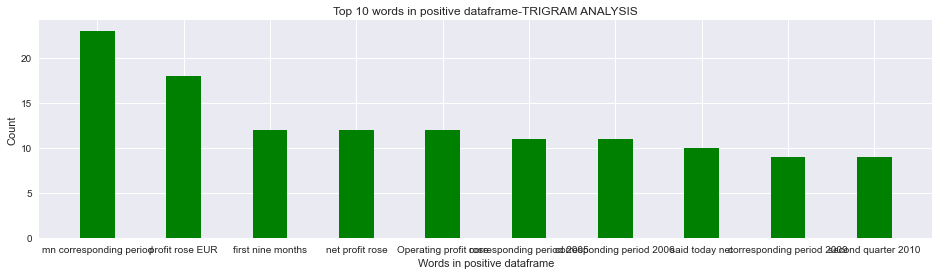

In [52]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [53]:
df_positive3.head(10)

,0,1
0,mn corresponding period,23
1,profit rose EUR,18
2,first nine months,12
3,net profit rose,12
4,Operating profit rose,12
5,corresponding period 2005,11
6,corresponding period 2006,11
7,said today net,10
8,corresponding period 2009,9
9,second quarter 2010,9


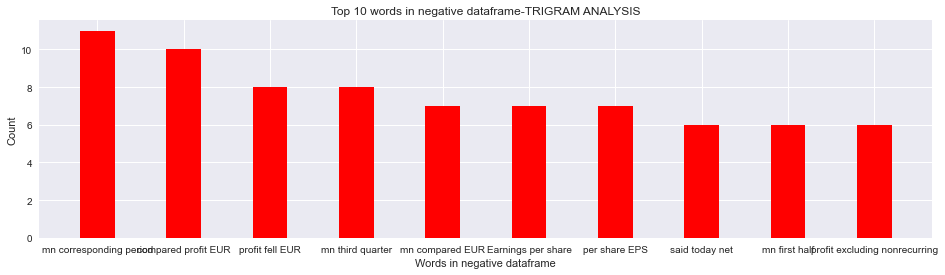

In [54]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [55]:
df_negative3.head(10)

,0,1
0,mn corresponding period,11
1,compared profit EUR,10
2,profit fell EUR,8
3,mn third quarter,8
4,mn compared EUR,7
5,Earnings per share,7
6,per share EPS,7
7,said today net,6
8,mn first half,6
9,profit excluding nonrecurring,6


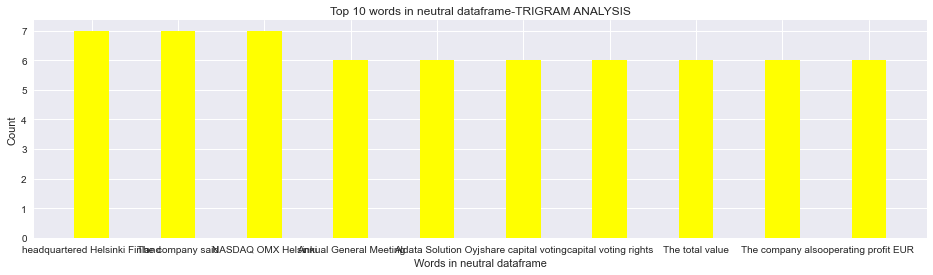

In [56]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [57]:
df_neutral3.head(10)

,0,1
0,headquartered Helsinki Finland,7
1,The company said,7
2,NASDAQ OMX Helsinki,7
3,Annual General Meeting,6
4,Aldata Solution Oyj,6
5,share capital voting,6
6,capital voting rights,6
7,The total value,6
8,The company also,6
9,operating profit EUR,6


**Using CountVectorizer()**

-can also b used to check the most common bigrams